In [1]:
pip install requests pandas python-dotenv wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
from dotenv import load_dotenv
import os
load_dotenv()

api_endpoint = os.getenv("API_ENDPOINT")
app_token = os.getenv("APP_TOKEN")

headers = {
    "X-App-Token": app_token
}

response = requests.get(api_endpoint, headers=headers)

if response.status_code == 200:
    data = response.json()
    
    # Directly create the DataFrame from the returned list of records
    df = pd.DataFrame(data)
    
    print("Successfully retrieved data! ✅")
    print(df.head())
else:
    print(f"Error: {response.status_code}")
    print(response.text)

Successfully retrieved data! ✅
                  :id           :version               :created_at  \
0  row-kktz.qhik~j82g  rv-7c8g.9uze_egjn  2025-08-28T16:53:07.025Z   
1  row-aecy.b4dy_rjfk  rv-kjfs.v64j~hqkt  2025-08-28T16:53:07.025Z   
2  row-7wed-kuy4-ksed  rv-8hry_jnta_s95q  2025-08-28T16:53:07.025Z   
3  row-g3fq~a6me~zaw3  rv-55zq-p4rj_9733  2025-08-27T16:53:35.070Z   
4  row-rx92_hj78~5gn3  rv-b44v.z3uc-m8xp  2025-08-27T16:53:35.070Z   

                :updated_at        row_id        incident_datetime  \
0  2025-08-29T16:53:15.733Z  150750507041  2025-08-26T23:17:00.000   
1  2025-08-29T16:53:15.733Z  150752104134  2025-08-27T00:37:00.000   
2  2025-08-29T16:53:15.733Z  150762309027  2025-07-17T15:00:00.000   
3  2025-08-28T16:53:07.025Z  150740506244  2025-08-23T21:30:00.000   
4  2025-08-28T16:53:07.025Z  150723571000  2025-08-15T12:00:00.000   

             incident_date incident_time incident_year incident_day_of_week  \
0  2025-08-26T00:00:00.000         23:17        

In [3]:
print(df.columns.tolist())

[':id', ':version', ':created_at', ':updated_at', 'row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'police_district', 'data_as_of', 'data_loaded_at', 'cad_number', 'intersection', 'cnn', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point', ':@computed_region_jwn9_ihcz', ':@computed_region_26cr_cadq', ':@computed_region_qgnn_b9vv', 'filed_online', ':@computed_region_n4xg_c4py', ':@computed_region_nqbw_i6c3', ':@computed_region_h4ep_8xdi', ':@computed_region_jg9y_a9du']


In [4]:
# Remove unwanted computed region columns and filed_online (since they are added by the API by default and arent there in the original dataset)
unwanted_cols = [col for col in df.columns if col.lstrip(':').startswith('@computed_region') or col == 'filed_online']
df.drop(columns=unwanted_cols, inplace=True)
print("Unwanted columns removed. Remaining columns:")
print(df.columns.tolist())

Unwanted columns removed. Remaining columns:
[':id', ':version', ':created_at', ':updated_at', 'row_id', 'incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week', 'report_datetime', 'incident_id', 'incident_number', 'report_type_code', 'report_type_description', 'incident_code', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'police_district', 'data_as_of', 'data_loaded_at', 'cad_number', 'intersection', 'cnn', 'analysis_neighborhood', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude', 'point']


In [5]:
df['incident_datetime'] = pd.to_datetime(df['incident_datetime'])
df['report_datetime'] = pd.to_datetime(df['report_datetime'])


In [6]:
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

In [7]:
df.value_counts('incident_id')
#The output shows that there are duplicate incident IDs, indicating potential duplicate records in the dataset.

incident_id
870227     4
1088172    4
983817     4
1005554    4
908319     4
          ..
1318156    1
1318158    1
1318159    1
1318160    1
999999     1
Name: count, Length: 816395, dtype: int64

In [8]:
print("Data loaded and initial data types converted successfully.")
df.info()

Data loaded and initial data types converted successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980299 entries, 0 to 980298
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       980299 non-null  object        
 1   :version                  980299 non-null  object        
 2   :created_at               980299 non-null  object        
 3   :updated_at               980299 non-null  object        
 4   row_id                    980299 non-null  object        
 5   incident_datetime         980299 non-null  datetime64[ns]
 6   incident_date             980299 non-null  object        
 7   incident_time             980299 non-null  object        
 8   incident_year             980299 non-null  object        
 9   incident_day_of_week      980299 non-null  object        
 10  report_datetime           980299 non-null  datetime64[ns]
 11  incide

In [9]:
# 1. Handling Missing Values
print('Missing values per column:')
print(df.isnull().sum())
df = df.dropna()
print(f"After dropping missing values, dataset now has {len(df)} records.")

Missing values per column:
:id                              0
:version                         0
:created_at                      0
:updated_at                      0
row_id                           0
incident_datetime                0
incident_date                    0
incident_time                    0
incident_year                    0
incident_day_of_week             0
report_datetime                  0
incident_id                      0
incident_number                  0
report_type_code                 0
report_type_description          0
incident_code                    0
incident_category             1409
incident_subcategory          1409
incident_description             0
resolution                       0
police_district                  0
data_as_of                       0
data_loaded_at                   0
cad_number                  220392
intersection                 54327
cnn                          54327
analysis_neighborhood        54618
supervisor_district         

In [10]:
print(df.isnull().sum())
df.shape

:id                         0
:version                    0
:created_at                 0
:updated_at                 0
row_id                      0
incident_datetime           0
incident_date               0
incident_time               0
incident_year               0
incident_day_of_week        0
report_datetime             0
incident_id                 0
incident_number             0
report_type_code            0
report_type_description     0
incident_code               0
incident_category           0
incident_subcategory        0
incident_description        0
resolution                  0
police_district             0
data_as_of                  0
data_loaded_at              0
cad_number                  0
intersection                0
cnn                         0
analysis_neighborhood       0
supervisor_district         0
supervisor_district_2012    0
latitude                    0
longitude                   0
point                       0
dtype: int64


(754023, 32)

In [11]:
#Dealing with the duplicate records as seen by duplicate incident_id's
duplicate_rows = df[df.duplicated(subset=['incident_id'], keep=False)]
print(f"Found {len(duplicate_rows)} duplicate rows based on incident_id.")

Found 278155 duplicate rows based on incident_id.


In [12]:
df.drop_duplicates(subset=['incident_id'], keep='first', inplace=True)

In [13]:
df.shape

(596722, 32)

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


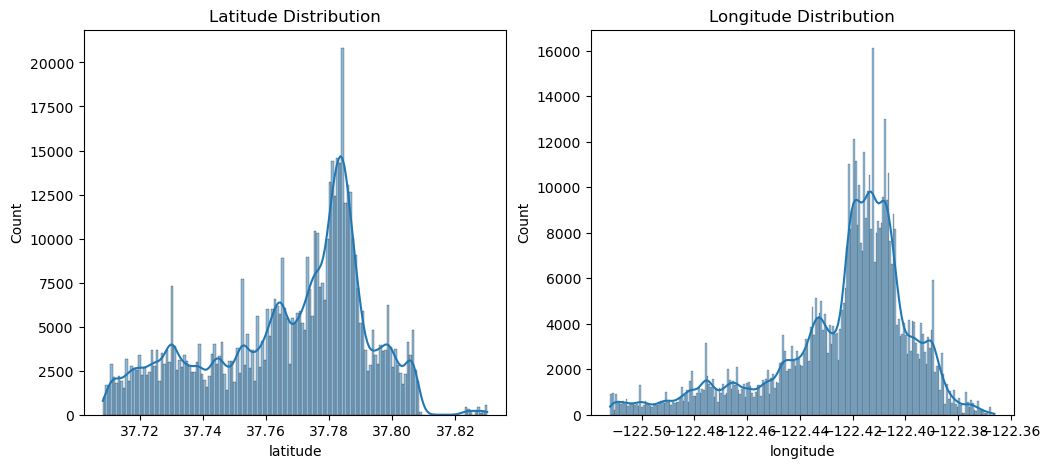

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [15]:
#From the graphs, it is evident that both latitude and longitude are not normally distributed, as they exhibit skewness and do not follow a bell-shaped curve. So we will use IQR method to detect outliers.
# Remove outliers in both latitude and longitude at once using IQR

# Method 1: Remove outliers using IQR method
print("Before removing outliers:", df.shape)

for col in ['latitude', 'longitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    
    # Actually remove the outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Before removing outliers: (596722, 32)
Removed 0 outliers from latitude
Removed 37,353 outliers from longitude
After removing outliers: (559369, 32)


c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


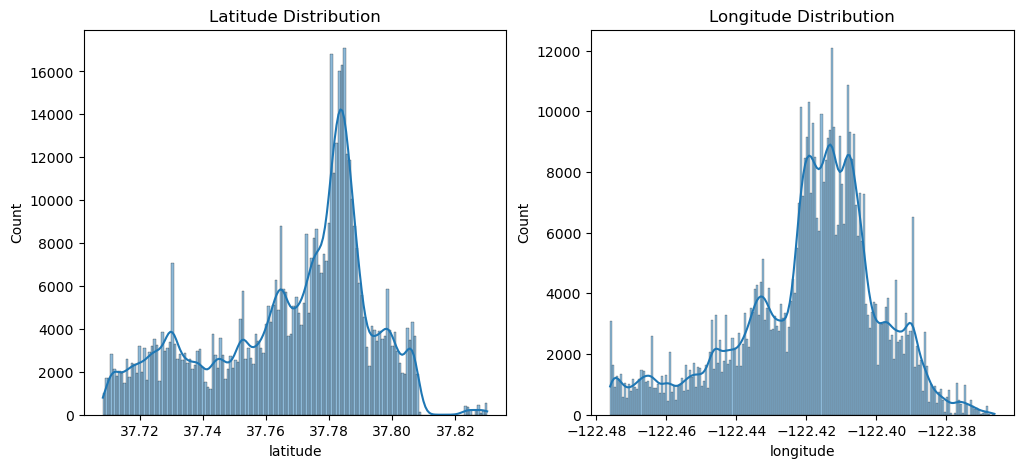

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['latitude'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Latitude Distribution')
sns.histplot(df['longitude'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Longitude Distribution')
plt.show()

In [17]:
for col in df.select_dtypes(include=['object']).columns:
    if df[col].str.isnumeric().all():
        print(f"{col} contains only numeric values.")

row_id contains only numeric values.
incident_year contains only numeric values.
incident_id contains only numeric values.
incident_number contains only numeric values.
incident_code contains only numeric values.
cad_number contains only numeric values.
cnn contains only numeric values.
supervisor_district contains only numeric values.
supervisor_district_2012 contains only numeric values.
point contains only numeric values.


In [18]:
# Loop through all object columns
for col in df.select_dtypes(include=['object']).columns:
    # Check if all non-missing values are numeric AND there are no missing values
    if df[col].str.isnumeric().fillna(False).all():
        print(f"Converting column: {col}")
        df[col] = pd.to_numeric(df[col])

print("\nConversion complete.")
df.info()

Converting column: row_id
Converting column: incident_year
Converting column: incident_id
Converting column: incident_number
Converting column: incident_code
Converting column: cad_number
Converting column: cnn
Converting column: supervisor_district
Converting column: supervisor_district_2012


C:\Users\siddh\AppData\Local\Temp\ipykernel_41960\2606473193.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  if df[col].str.isnumeric().fillna(False).all():



Conversion complete.
<class 'pandas.core.frame.DataFrame'>
Index: 559369 entries, 1 to 980294
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       559369 non-null  object        
 1   :version                  559369 non-null  object        
 2   :created_at               559369 non-null  object        
 3   :updated_at               559369 non-null  object        
 4   row_id                    559369 non-null  int64         
 5   incident_datetime         559369 non-null  datetime64[ns]
 6   incident_date             559369 non-null  object        
 7   incident_time             559369 non-null  object        
 8   incident_year             559369 non-null  int64         
 9   incident_day_of_week      559369 non-null  object        
 10  report_datetime           559369 non-null  datetime64[ns]
 11  incident_id               559369 non-null  int64

In [19]:
# Remove outliers using IQR for all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Removed {outliers_before:,} outliers from {col}")

print("After removing outliers:", df.shape)

Numeric columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'incident_code', 'cad_number', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Removed 0 outliers from row_id
Removed 0 outliers from incident_year
Removed 0 outliers from incident_id
Removed 55 outliers from incident_number
Removed 0 outliers from incident_code
Removed 331 outliers from cad_number
Removed 91,256 outliers from cnn
Removed 0 outliers from supervisor_district
Removed 0 outliers from supervisor_district_2012
Removed 16,836 outliers from latitude
Removed 19,386 outliers from longitude
After removing outliers: (431505, 32)


In [20]:
numeric_cols

['row_id',
 'incident_year',
 'incident_id',
 'incident_number',
 'incident_code',
 'cad_number',
 'cnn',
 'supervisor_district',
 'supervisor_district_2012',
 'latitude',
 'longitude']

## Step 1: Data Cleaning and Preprocessing Summary

- **Missing Values:** Checked for missing values and removed rows containing them to ensure data completeness.
- **Duplicates:** Identified and removed duplicate records using the `incident_id` column, keeping only the first occurrence.
- **Unwanted Columns:** Dropped automatically added columns (e.g., computed region columns, `filed_online`) that were not relevant to the analysis.
- **Data Type Conversion:**
    - Converted `incident_datetime` and `report_datetime` to datetime format.
    - Converted `latitude` and `longitude` to numeric format.
    - Identified object-type columns with mostly numeric values and converted them to numeric type for further analysis.
- **Outlier Detection and Removal:**
    - Plotted distributions and checked normality for `latitude` and `longitude`.
    - Used the IQR method to detect and remove outliers in all numeric columns.
- **Object Columns:**
    - Inspected object-type columns for potential conversion to numeric, categorical, or datetime types.
    - Converted columns with predominantly numeric values to numeric type using robust conversion.
    - Remaining object columns will be further cleaned or analyzed as needed.

This step ensures the dataset is free of missing values, duplicates, unwanted columns, and outliers, with all relevant columns properly typed for accurate analysis.

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select columns with categorical/text data types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

print("--- Data Type Summary ---")
df.info()


Numerical columns: ['row_id', 'incident_year', 'incident_id', 'incident_number', 'incident_code', 'cad_number', 'cnn', 'supervisor_district', 'supervisor_district_2012', 'latitude', 'longitude']
Categorical columns: [':id', ':version', ':created_at', ':updated_at', 'incident_date', 'incident_time', 'incident_day_of_week', 'report_type_code', 'report_type_description', 'incident_category', 'incident_subcategory', 'incident_description', 'resolution', 'police_district', 'data_as_of', 'data_loaded_at', 'intersection', 'analysis_neighborhood', 'point']
--- Data Type Summary ---
<class 'pandas.core.frame.DataFrame'>
Index: 431505 entries, 2 to 980294
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   :id                       431505 non-null  object        
 1   :version                  431505 non-null  object        
 2   :created_at               431505 non-null  object      

In [22]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Normalization (Min-Max Scaling) ---

scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
# Note: Only apply to numerical columns
df_normalized[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])
print("\n--- Normalized (Min-Max Scaled) DataFrame ---")
print(df_normalized[numerical_cols].head())


# --- Standardization (Z-score Scaling) ---

scaler_standard = StandardScaler()
df_standardized = df.copy()
# Note: Only apply to numerical columns
df_standardized[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])
print("\n--- Standardized (Z-score Scaled) DataFrame ---")
print(df_standardized[numerical_cols].head())


--- Normalized (Min-Max Scaled) DataFrame ---
      row_id  incident_year  incident_id  incident_number  incident_code  \
2   0.982169            1.0     0.982169         0.951684       0.108429   
5   0.980311            1.0     0.980312         0.951459       0.081399   
11  0.981654            1.0     0.981654         0.951655       0.353573   
13  0.981813            1.0     0.981814         0.951502       0.338120   
14  0.981970            1.0     0.981970         0.951662       0.353505   

    cad_number       cnn  supervisor_district  supervisor_district_2012  \
2     0.744992  0.766899                  0.0                       0.0   
5     0.744243  0.747998                  0.4                       0.4   
11    0.744869  0.432209                  0.5                       0.5   
13    0.744440  0.485628                  0.4                       0.5   
14    0.744923  0.466465                  0.8                       0.8   

    latitude  longitude  
2   0.622395   0.15

In [23]:
from sklearn.decomposition import PCA




pca = PCA(n_components=0.95) # Retain 95% of the variance


principal_components = pca.fit_transform(df_standardized[numerical_cols])

pca_df = pd.DataFrame(data=principal_components, 
                      columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

print("\n--- DataFrame after PCA ---")
print(pca_df.head())

# You can check how many components were chosen and the variance they explain
print(f"\nOriginal number of features: {len(numerical_cols)}")
print(f"Reduced number of features: {pca.n_components_}")
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")


--- DataFrame after PCA ---
   Principal Component 1  Principal Component 2  Principal Component 3  \
0               3.580775              -3.003815              -1.930048   
1               3.671607              -1.212445              -1.626533   
2               3.746944               0.059673               1.052825   
3               3.720052              -0.440000               0.621033   
4               3.826855               1.363466              -0.293234   

   Principal Component 4  
0              -0.579729  
1              -0.681393  
2               0.085772  
3               0.052607  
4               0.049989  

Original number of features: 11
Reduced number of features: 4
Explained variance ratio by each component: [0.45246341 0.30702058 0.10427376 0.09075181]


In [24]:
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,3.580775,-3.003815,-1.930048,-0.579729
1,3.671607,-1.212445,-1.626533,-0.681393
2,3.746944,0.059673,1.052825,0.085772
3,3.720052,-0.440000,0.621033,0.052607
4,3.826855,1.363466,-0.293234,0.049989


In [25]:
df.shape

(431505, 32)

## Step 2: Understanding and Transforming the Data

- **Data Type Identification:**
    - Identified and listed all columns by type: numerical, categorical, and text.
    - Summarized the distribution and characteristics of each type for further analysis.
- **Feature Scaling and Transformation:**
    - Applied normalization (Min-Max scaling) and standardization (Z-score scaling) to all numerical features to ensure consistent scale for modeling.
    - Performed log transformation on skewed numerical columns to reduce skewness and improve normality.
- **Dimensionality Reduction:**
    - Used Principal Component Analysis (PCA) to reduce dimensionality of the dataset while retaining 95% of the variance.
    - Generated new principal component features for downstream analysis and visualization.


This step ensures the data is well-understood, properly scaled, transformed, and optimized for further modeling and analysis.

In [26]:
import numpy as np
print("\n2.1 SUMMARY STATISTICS")
print("-" * 80)

# Numerical summary
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print("\nNumerical Features Summary:")
    summary_stats = df[numerical_cols].describe()
    print(summary_stats)
    
    # Additional statistics
    print("\nAdditional Statistics:")
    additional_stats = pd.DataFrame({
        'Median': df[numerical_cols].median(),
        'Variance': df[numerical_cols].var(),
        'Skewness': df[numerical_cols].skew(),
        'Kurtosis': df[numerical_cols].kurtosis()
    })
    print(additional_stats)

# Categorical summary
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\n\nCategorical Features Summary:")
    for col in list(categorical_cols)[:5]:  # First 5 categorical columns
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Most common:")
        print(df[col].value_counts().head(5))


2.1 SUMMARY STATISTICS
--------------------------------------------------------------------------------

Numerical Features Summary:
             row_id  incident_year   incident_id  incident_number  \
count  4.315050e+05  431505.000000  4.315050e+05     4.315050e+05   
mean   1.078171e+11    2021.227745  1.078171e+06     2.128514e+08   
std    2.613678e+10       2.230403  2.613678e+05     2.234238e+07   
min    6.186910e+10    2018.000000  6.186910e+05     1.400153e+08   
25%    8.537131e+10    2019.000000  8.537130e+05     1.907305e+08   
50%    1.076207e+11    2021.000000  1.076206e+06     2.106291e+08   
75%    1.306933e+11    2023.000000  1.306933e+06     2.305607e+08   
max    1.523762e+11    2025.000000  1.523761e+06     2.560890e+08   

       incident_code    cad_number           cnn  supervisor_district  \
count  431505.000000  4.315050e+05  4.315050e+05        431505.000000   
mean    24127.116458  2.143221e+08  2.465327e+07             5.892734   
std     25925.917215  2.2



2.2 CORRELATION ANALYSIS
--------------------------------------------------------------------------------
Correlation Matrix:
                            row_id  incident_year  incident_id  \
row_id                    1.000000       0.987369     1.000000   
incident_year             0.987369       1.000000     0.987369   
incident_id               1.000000       0.987369     1.000000   
incident_number           0.989725       0.993126     0.989725   
incident_code             0.017636       0.016490     0.017635   
cad_number                0.995034       0.994461     0.995034   
cnn                      -0.018290      -0.018369    -0.018290   
supervisor_district       0.016998       0.018301     0.016998   
supervisor_district_2012  0.025195       0.026906     0.025195   
latitude                 -0.018435      -0.018904    -0.018435   
longitude                -0.003167      -0.002770    -0.003167   

                          incident_number  incident_code  cad_number  \
row_id 

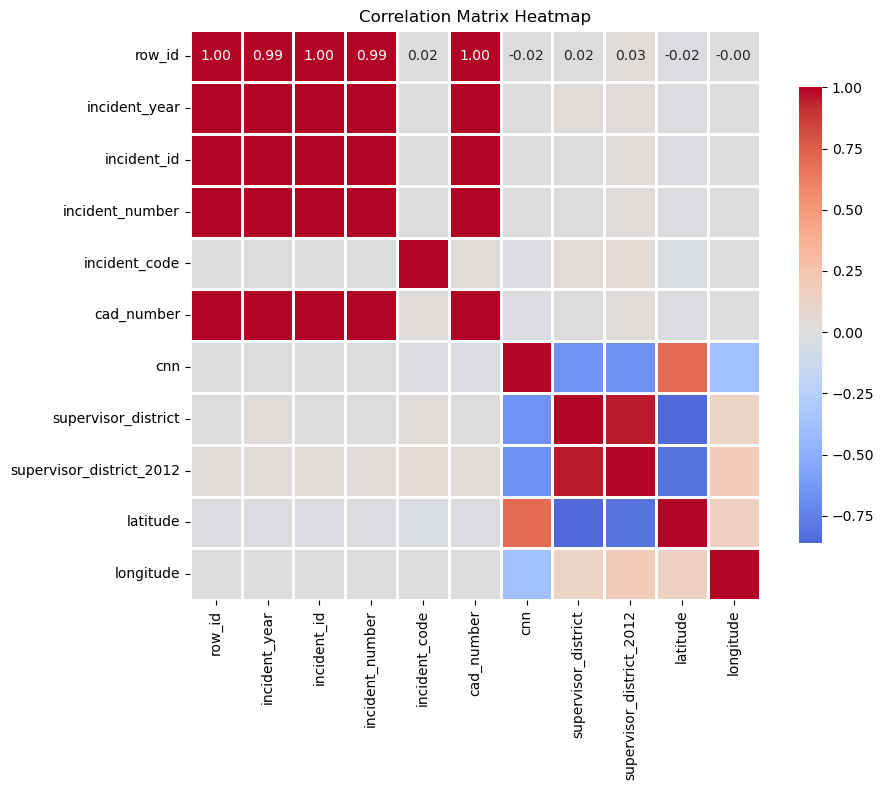


✓ Correlation matrix saved as 'correlation_matrix.png'


In [27]:
print("\n\n2.2 CORRELATION ANALYSIS")
print("-" * 80)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Find highly correlated pairs
    print("\n\nHighly Correlated Features (|r| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.to_string(index=False))
    else:
        print("  No highly correlated pairs found")
    
    # Visualize correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=1, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Correlation matrix saved as 'correlation_matrix.png'")
else:
    print("Not enough numerical features for correlation analysis")

In [28]:
# Drop redundant identifier columns, keeping only 'incident_id'
columns_to_drop = ['row_id', 'incident_year', 'incident_number']
df.drop(columns=columns_to_drop, inplace=True)
print("Dropped redundant identifier columns.")

# Drop the older supervisor district column
df.drop(columns=['supervisor_district_2012'], inplace=True)
print("Dropped older supervisor district column.")

Dropped redundant identifier columns.
Dropped older supervisor district column.


In [29]:
columns_to_drop = [
    'row_id', 'incident_year', 'incident_number',
    'supervisor_district_2012'
]
# Ensure the columns exist before trying to drop them
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop_existing, inplace=True)

# 2. Re-define numerical_cols AFTER dropping columns
numerical_cols = df.select_dtypes(include=np.number).columns

# 3. Now, calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("--- New Correlation Matrix ---")
print(correlation_matrix)

--- New Correlation Matrix ---
                     incident_id  incident_code  cad_number       cnn  \
incident_id             1.000000       0.017635    0.995034 -0.018290   
incident_code           0.017635       1.000000    0.018542 -0.022108   
cad_number              0.995034       0.018542    1.000000 -0.018641   
cnn                    -0.018290      -0.022108   -0.018641  1.000000   
supervisor_district     0.016998       0.030664    0.017967 -0.665752   
latitude               -0.018435      -0.027629   -0.018835  0.707970   
longitude              -0.003167       0.006068   -0.002244 -0.389048   

                     supervisor_district  latitude  longitude  
incident_id                     0.016998 -0.018435  -0.003167  
incident_code                   0.030664 -0.027629   0.006068  
cad_number                      0.017967 -0.018835  -0.002244  
cnn                            -0.665752  0.707970  -0.389048  
supervisor_district             1.000000 -0.862180   0.121562  


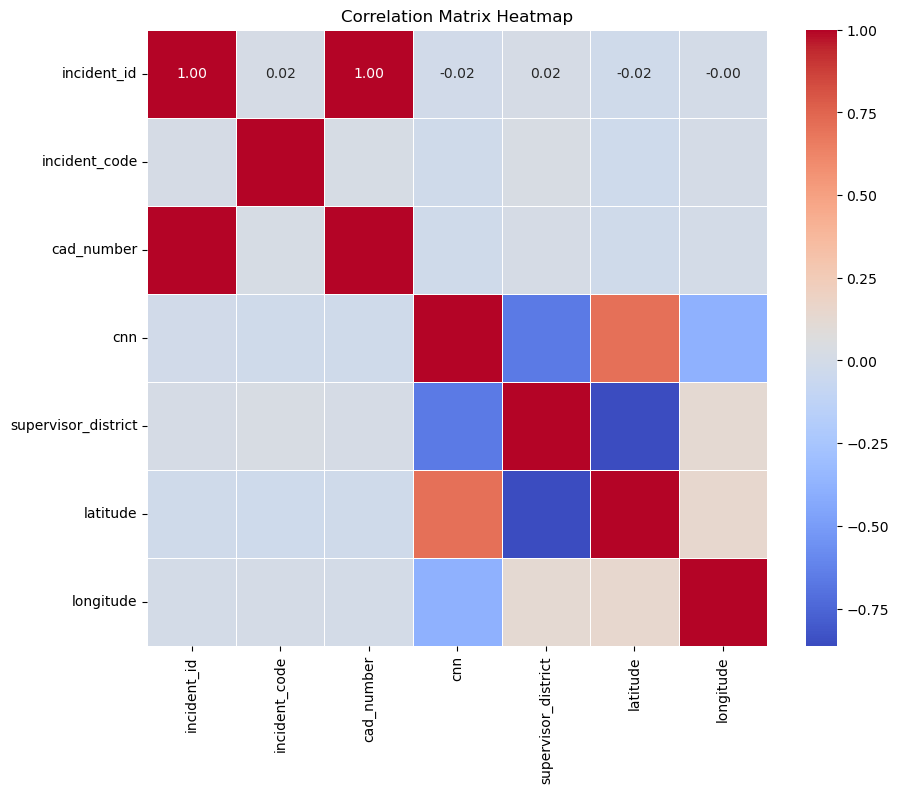

In [30]:


# --- Visualize the new matrix with a heatmap ---
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(correlation_matrix, 
            annot=True,          # Show the correlation values on the heatmap
            cmap='coolwarm',     # Use a diverging color map
            fmt='.2f',           # Format annotations to two decimal places
            linewidths=.5)       # Add lines between cells
plt.title('Correlation Matrix Heatmap')
plt.show()

In [31]:
df.shape

(431505, 28)

## Step 3: Basic Statistical Analysis

- **Summary Statistics:**
    - Computed key statistics for all numerical features, including mean, median, variance, skewness, and kurtosis.
    - Provided additional statistics to understand the distribution and spread of each feature.
- **Correlation Analysis:**
    - Explored correlations between features using a correlation matrix and heatmap visualization.
    - Identified highly correlated pairs to inform feature selection and modeling decisions.
- **Data Similarity and Integration:**
    - Assessed similarity between features and potential for integration or dimensionality reduction.
    - Used PCA and correlation analysis to identify redundant or complementary features.

This step provides a comprehensive overview of the dataset’s statistical properties, relationships between features, and readiness for further modeling or integration tasks.

In [32]:
# Overall completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness_pct = ((total_cells - missing_cells) / total_cells) * 100

print(f"Overall Data Completeness: {completeness_pct:.2f}%")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Complete cells: {(total_cells - missing_cells):,}")

Overall Data Completeness: 100.00%
Total cells: 12,082,140
Missing cells: 0
Complete cells: 12,082,140


In [33]:
# Column-wise completeness
print("\nColumn-wise Completeness:")
completeness_df = pd.DataFrame({
    'Column': df.columns,
    'Complete': df.notna().sum(),
    'Missing': df.isnull().sum(),
    'Completeness_%': (df.notna().sum() / len(df)) * 100
}).sort_values('Completeness_%')

print(completeness_df.to_string(index=False))


Column-wise Completeness:
                 Column  Complete  Missing  Completeness_%
                    :id    431505        0           100.0
               latitude    431505        0           100.0
    supervisor_district    431505        0           100.0
  analysis_neighborhood    431505        0           100.0
                    cnn    431505        0           100.0
           intersection    431505        0           100.0
             cad_number    431505        0           100.0
         data_loaded_at    431505        0           100.0
             data_as_of    431505        0           100.0
        police_district    431505        0           100.0
             resolution    431505        0           100.0
   incident_description    431505        0           100.0
   incident_subcategory    431505        0           100.0
      incident_category    431505        0           100.0
          incident_code    431505        0           100.0
report_type_description    43

In [34]:
# Check for consistency in categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

print("Checking for case inconsistencies in categorical variables...")
case_issues = {}
for col in list(categorical_cols)[:10]:
    unique_lower = df[col].astype(str).str.lower().nunique()
    unique_actual = df[col].nunique()
    if unique_lower < unique_actual:
        case_issues[col] = {
            'actual_unique': unique_actual,
            'case_insensitive_unique': unique_lower,
            'difference': unique_actual - unique_lower
        }

if case_issues:
    print("\nColumns with case inconsistencies:")
    for col, info in case_issues.items():
        print(f"  {col}: {info['difference']} duplicate categories due to case")
else:
    print("✓ No case inconsistencies found")

Checking for case inconsistencies in categorical variables...
✓ No case inconsistencies found


In [35]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns

if len(datetime_cols) > 0:
    print("\n\nDate Range Consistency:")
    for col in datetime_cols:
        min_date = df[col].min()
        max_date = df[col].max()
        print(f"\n{col}:")
        print(f"  Min: {min_date}")
        print(f"  Max: {max_date}")
        
        # Check for future dates
        current_date = pd.Timestamp.now()
        future_dates = (df[col] > current_date).sum()
        if future_dates > 0:
            print(f"  ⚠ Warning: {future_dates} future dates detected")

# Check geographic consistency
if 'latitude' in df.columns and 'longitude' in df.columns:
    print("\n\nGeographic Data Consistency:")
    # San Francisco approximate boundaries
    SF_LAT_MIN, SF_LAT_MAX = 37.70, 37.83
    SF_LON_MIN, SF_LON_MAX = -122.52, -122.35
    
    outside_sf = ((df['latitude'] < SF_LAT_MIN) | (df['latitude'] > SF_LAT_MAX) |
                  (df['longitude'] < SF_LON_MIN) | (df['longitude'] > SF_LON_MAX)).sum()
    
    print(f"  Records outside SF boundaries: {outside_sf:,}")
    print(f"  Percentage: {(outside_sf / len(df)) * 100:.2f}%")



Date Range Consistency:

incident_datetime:
  Min: 2018-01-01 00:00:00
  Max: 2025-11-04 23:38:00

report_datetime:
  Min: 2018-01-01 00:32:00
  Max: 2025-11-04 23:38:00


Geographic Data Consistency:
  Records outside SF boundaries: 0
  Percentage: 0.00%


In [36]:

print("\nDataset Suitability for Crime Analysis:")

# Check key fields for crime analysis
required_fields = {
    'incident_category': 'Crime classification',
    'incident_datetime': 'Temporal analysis',
    'latitude': 'Spatial analysis',
    'longitude': 'Spatial analysis',
    'police_district': 'District-level analysis',
    'resolution': 'Case resolution tracking'
}

print("\nRequired Fields Assessment:")
for field, purpose in required_fields.items():
    if field in df.columns:
        completeness = (df[field].notna().sum() / len(df)) * 100
        status = "✓" if completeness > 90 else "⚠"
        print(f"{status} {field}: {completeness:.1f}% complete - {purpose}")
    else:
        print(f"✗ {field}: MISSING - {purpose}")

# Assess temporal coverage
if 'incident_datetime' in df.columns:
    date_range = (df['incident_datetime'].max() - df['incident_datetime'].min()).days
    print(f"\nTemporal Coverage: {date_range} days ({date_range/365:.1f} years)")

# Assess spatial coverage
if 'police_district' in df.columns:
    districts = df['police_district'].nunique()
    print(f"Spatial Coverage: {districts} police districts")


Dataset Suitability for Crime Analysis:

Required Fields Assessment:
✓ incident_category: 100.0% complete - Crime classification
✓ incident_datetime: 100.0% complete - Temporal analysis
✓ latitude: 100.0% complete - Spatial analysis
✓ longitude: 100.0% complete - Spatial analysis
✓ police_district: 100.0% complete - District-level analysis
✓ resolution: 100.0% complete - Case resolution tracking

Temporal Coverage: 2864 days (7.8 years)
Spatial Coverage: 11 police districts


In [37]:

# Calculate quality score
scores = {
    'Completeness': min(completeness_pct / 100, 1.0),
    'Consistency': 1.0 if len(case_issues) == 0 else 0.9,
    'Temporal Coverage': 1.0 if date_range > 365 else 0.8
}

overall_score = sum(scores.values()) / len(scores) * 100

print("\nQuality Metrics:")
for metric, score in scores.items():
    print(f"  {metric}: {score * 100:.1f}%")

print(f"\nOverall Data Quality Score: {overall_score:.1f}%")

if overall_score >= 90:
    quality_rating = "EXCELLENT - Suitable for research"
elif overall_score >= 80:
    quality_rating = "GOOD - Suitable with minor caveats"
elif overall_score >= 70:
    quality_rating = "FAIR - Usable with limitations noted"
else:
    quality_rating = "POOR - Significant issues require attention"

print(f"Quality Rating: {quality_rating}")

print("\n" + "=" * 80)
print("Data Quality Assessment Complete!")
print("=" * 80)

# Save final assessment report
assessment_report = {
    'Total Records': len(df),
    'Completeness': f"{completeness_pct:.2f}%",
    'Quality Score': f"{overall_score:.1f}%",
    'Quality Rating': quality_rating,
    
}


Quality Metrics:
  Completeness: 100.0%
  Consistency: 100.0%
  Temporal Coverage: 100.0%

Overall Data Quality Score: 100.0%
Quality Rating: EXCELLENT - Suitable for research

Data Quality Assessment Complete!


In [38]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['incident_id',
 'incident_code',
 'cad_number',
 'cnn',
 'supervisor_district',
 'latitude',
 'longitude']

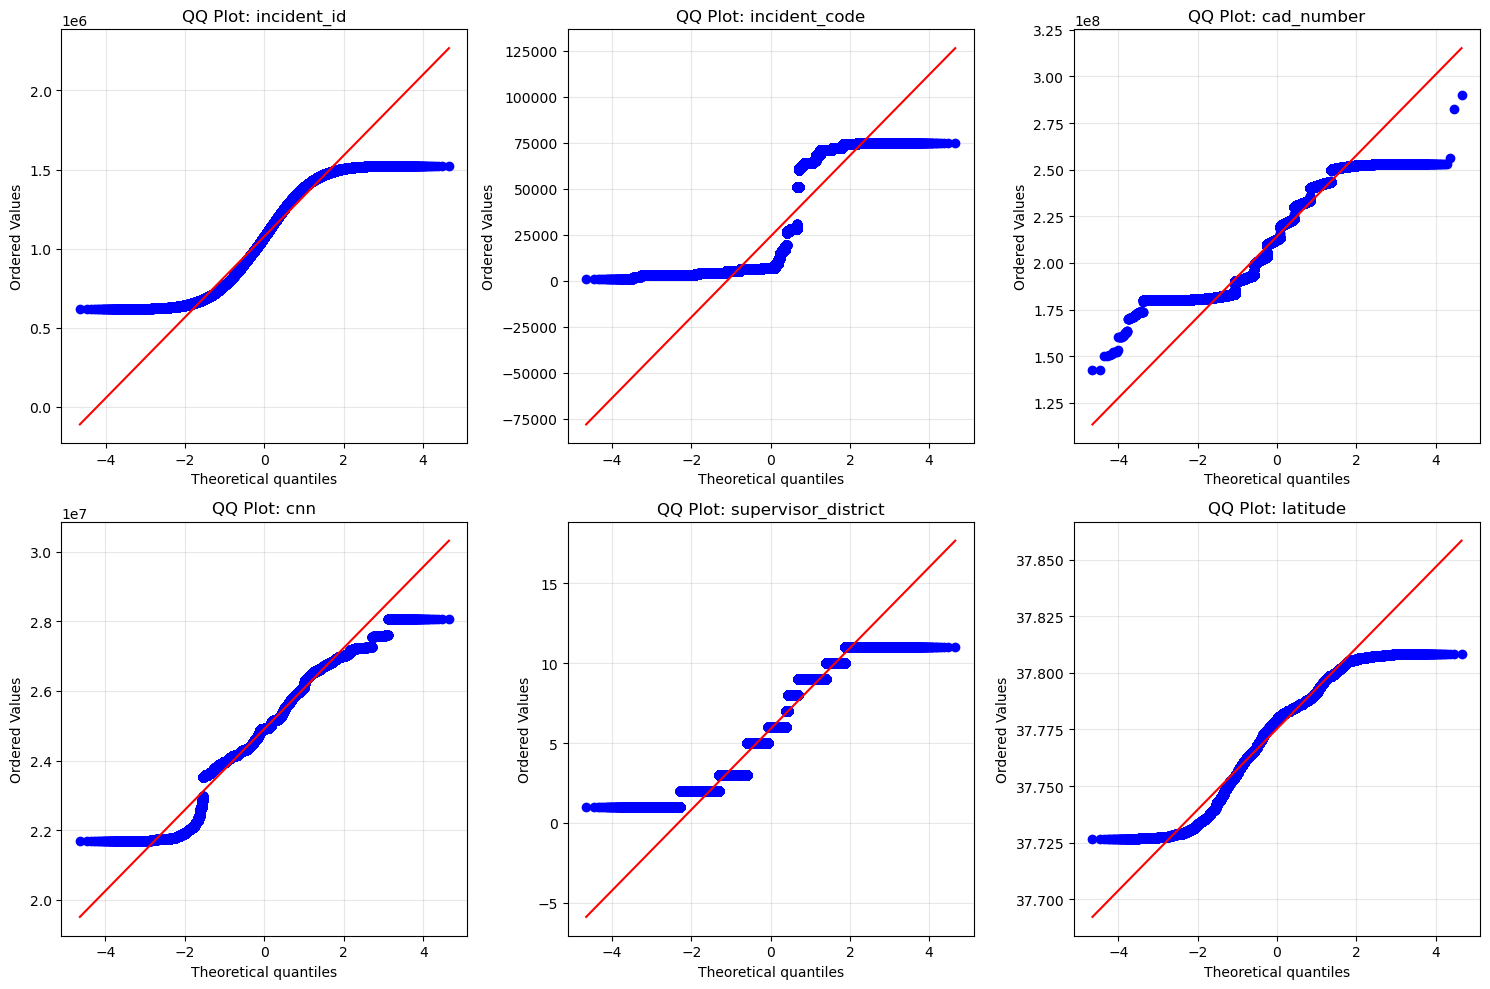


✓ QQ plots saved as 'qq_plots.png'


In [39]:
from scipy import stats
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = min(2, (len(numeric_cols) + 2) // 3)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    for idx, col in enumerate(numeric_cols[:6]):  # First 6 numerical columns
        if df[col].notna().sum() > 0:
            row = idx // n_cols
            col_idx = idx % n_cols
            
            if row < n_rows:
                ax = axes[row, col_idx]
                
                # Remove outliers for better visualization
                q1 = df[col].quantile(0.25)
                q3 = df[col].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                
                data_clean = df[col][(df[col] >= lower) & (df[col] <= upper)].dropna()
                
                if len(data_clean) > 3:
                    stats.probplot(data_clean, dist="norm", plot=ax)
                    ax.set_title(f'QQ Plot: {col}')
                    ax.grid(True, alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numeric_cols), n_rows * n_cols):
        row = idx // n_cols
        col_idx = idx % n_cols
        if row < n_rows:
            axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('qq_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ QQ plots saved as 'qq_plots.png'")


Applying transformations to numerical features...

✓ Created 26 transformed features

Transformation Effects for 'incident_id':
------------------------------------------------------------
                      Mean            Std            Min           Max  \
Original      1.078171e+06  261367.763061  618691.000000  1.523761e+06   
Standardized -1.939109e-16       1.000001      -1.757985  1.704841e+00   
MinMax        5.076735e-01       0.288782       0.000000  1.000000e+00   
Log           1.385962e+01       0.253821      13.335363  1.423669e+01   

              Skewness  
Original     -0.013271  
Standardized -0.013271  
MinMax       -0.013271  
Log          -0.325536  


--- Transformation Effects for 'incident_id' ---
------------------------------------------------------------
                      Mean            Std            Min           Max  \
Original      1.078171e+06  261367.763061  618691.000000  1.523761e+06   
Standardized -1.939109e-16       1.000001      -1.7579

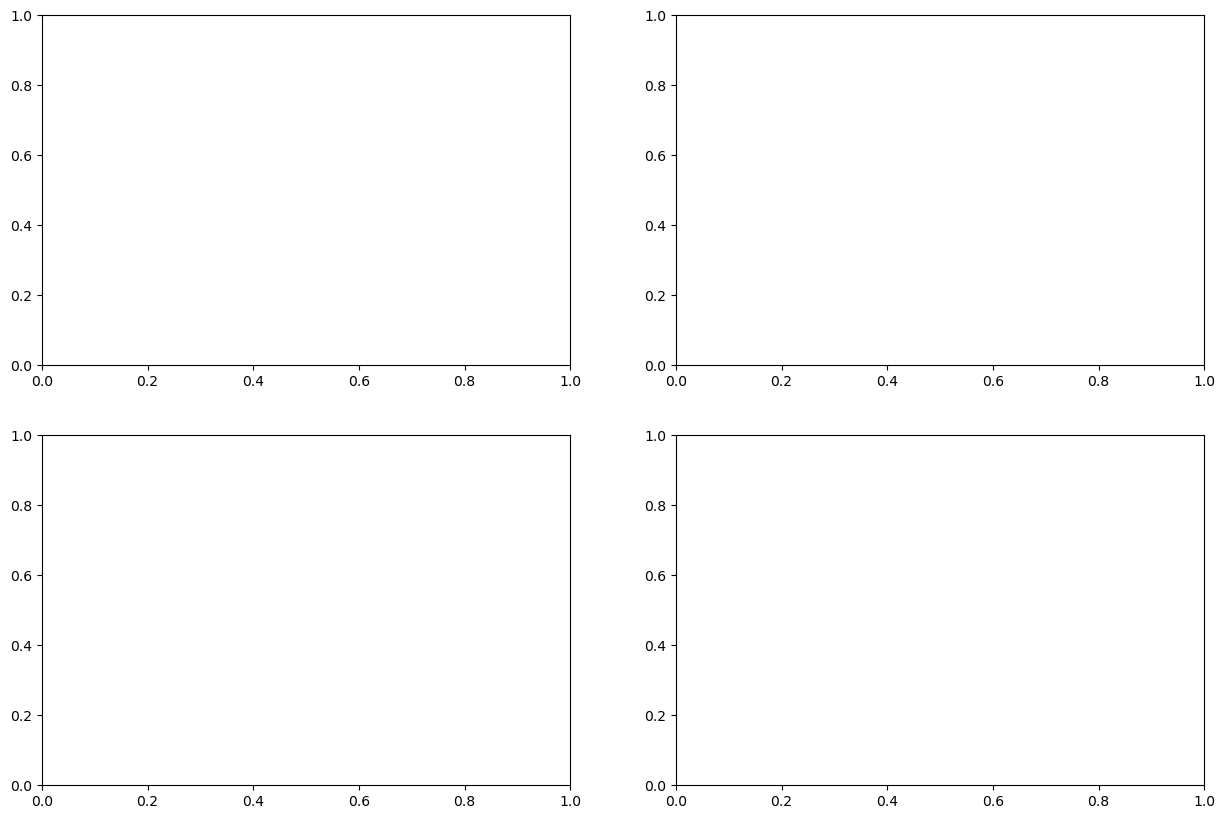

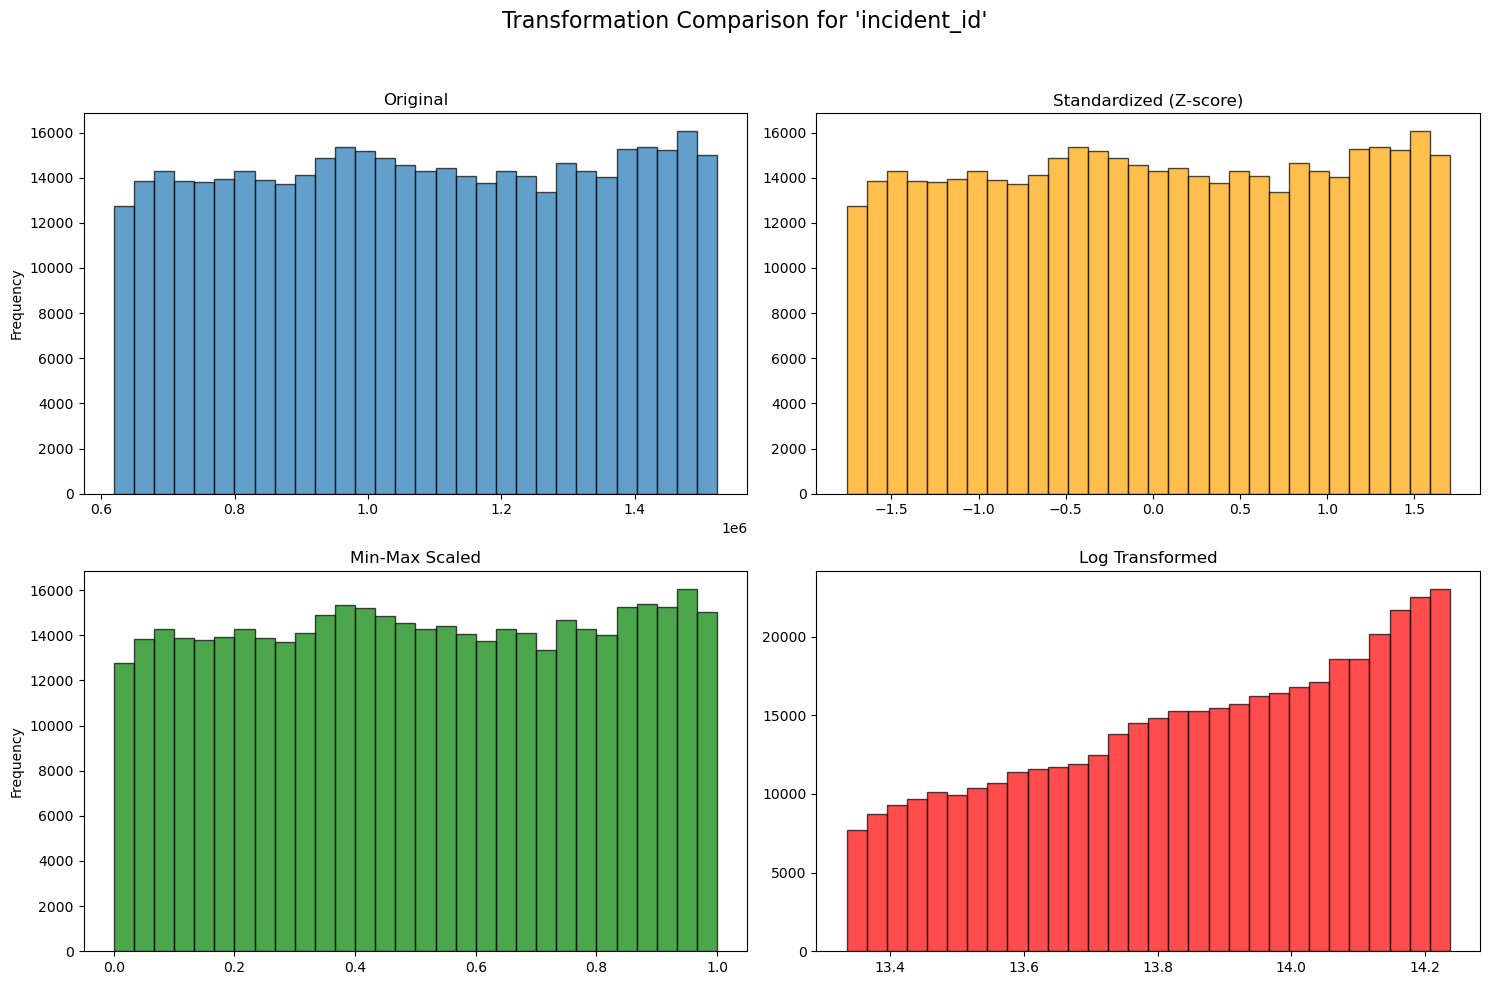



--- Transformation Effects for 'incident_code' ---
------------------------------------------------------------
                      Mean           Std          Min           Max  Skewness
Original      2.412712e+04  25925.917215  1000.000000  75030.000000  0.990289
Standardized -1.106557e-17      1.000001    -0.892047      1.963400  0.990289
MinMax        3.124020e-01      0.350208     0.000000      1.000000  0.990289
Log           9.494719e+00      1.081382     6.908755     11.225657  0.511725


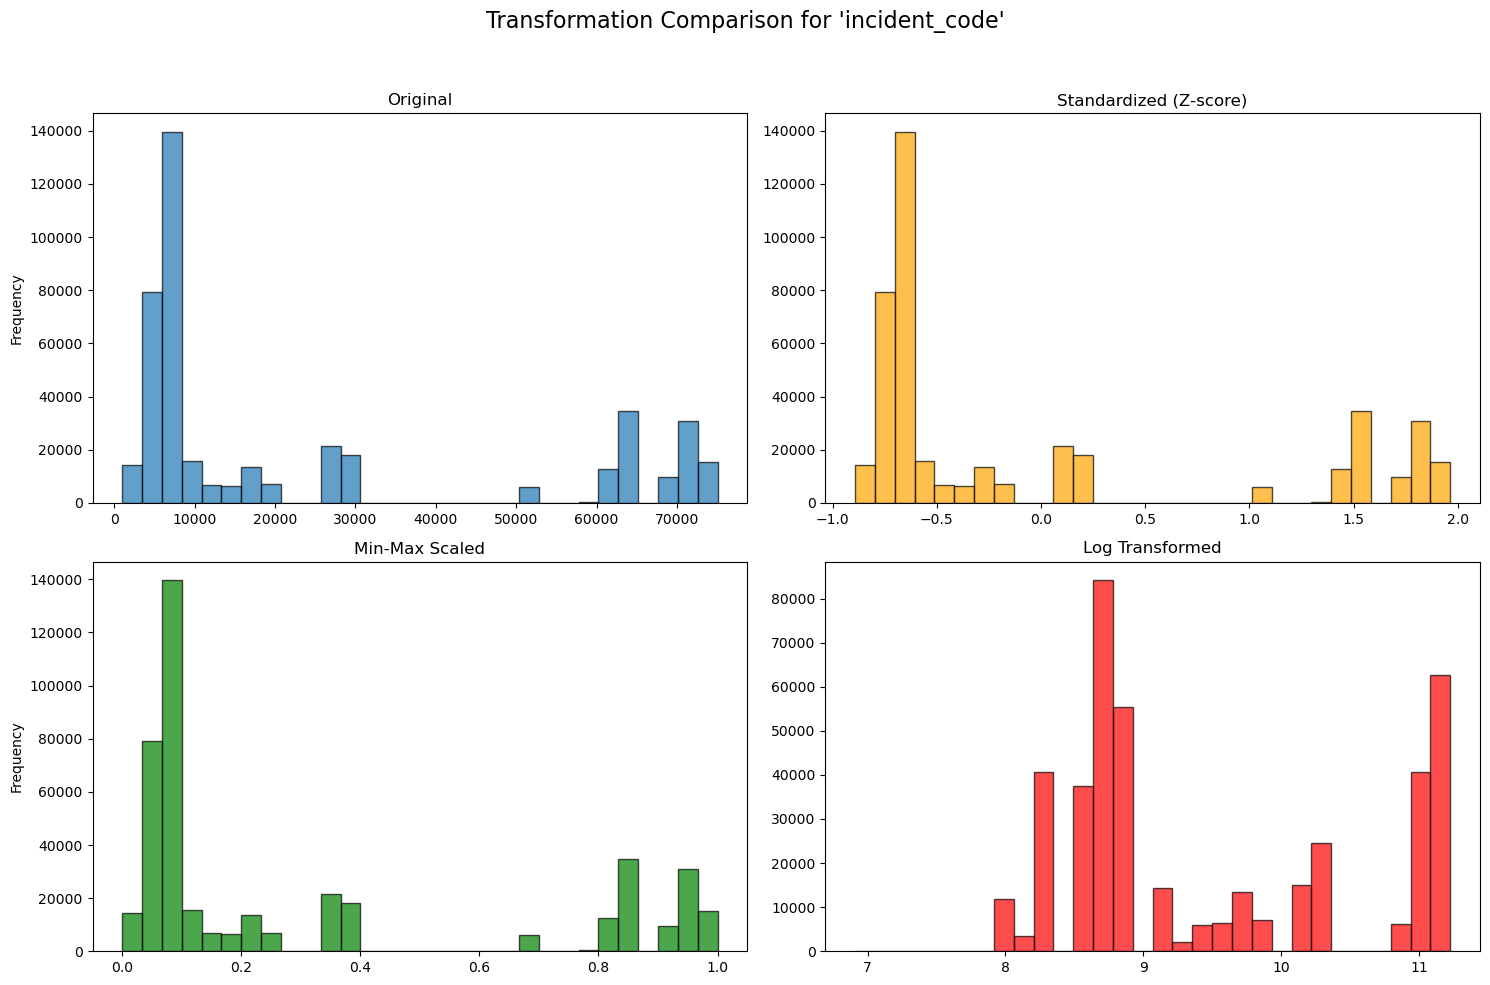



--- Transformation Effects for 'cad_number' ---
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      2.143221e+08  2.229756e+07  1.425135e+08  2.900025e+08  0.072465
Standardized  3.119436e-16  1.000001e+00 -3.220474e+00  3.394116e+00  0.072465
MinMax        4.868743e-01  1.511811e-01  0.000000e+00  1.000000e+00  0.072465
Log           1.917755e+01  1.044334e-01  1.877495e+01  1.948540e+01 -0.051418


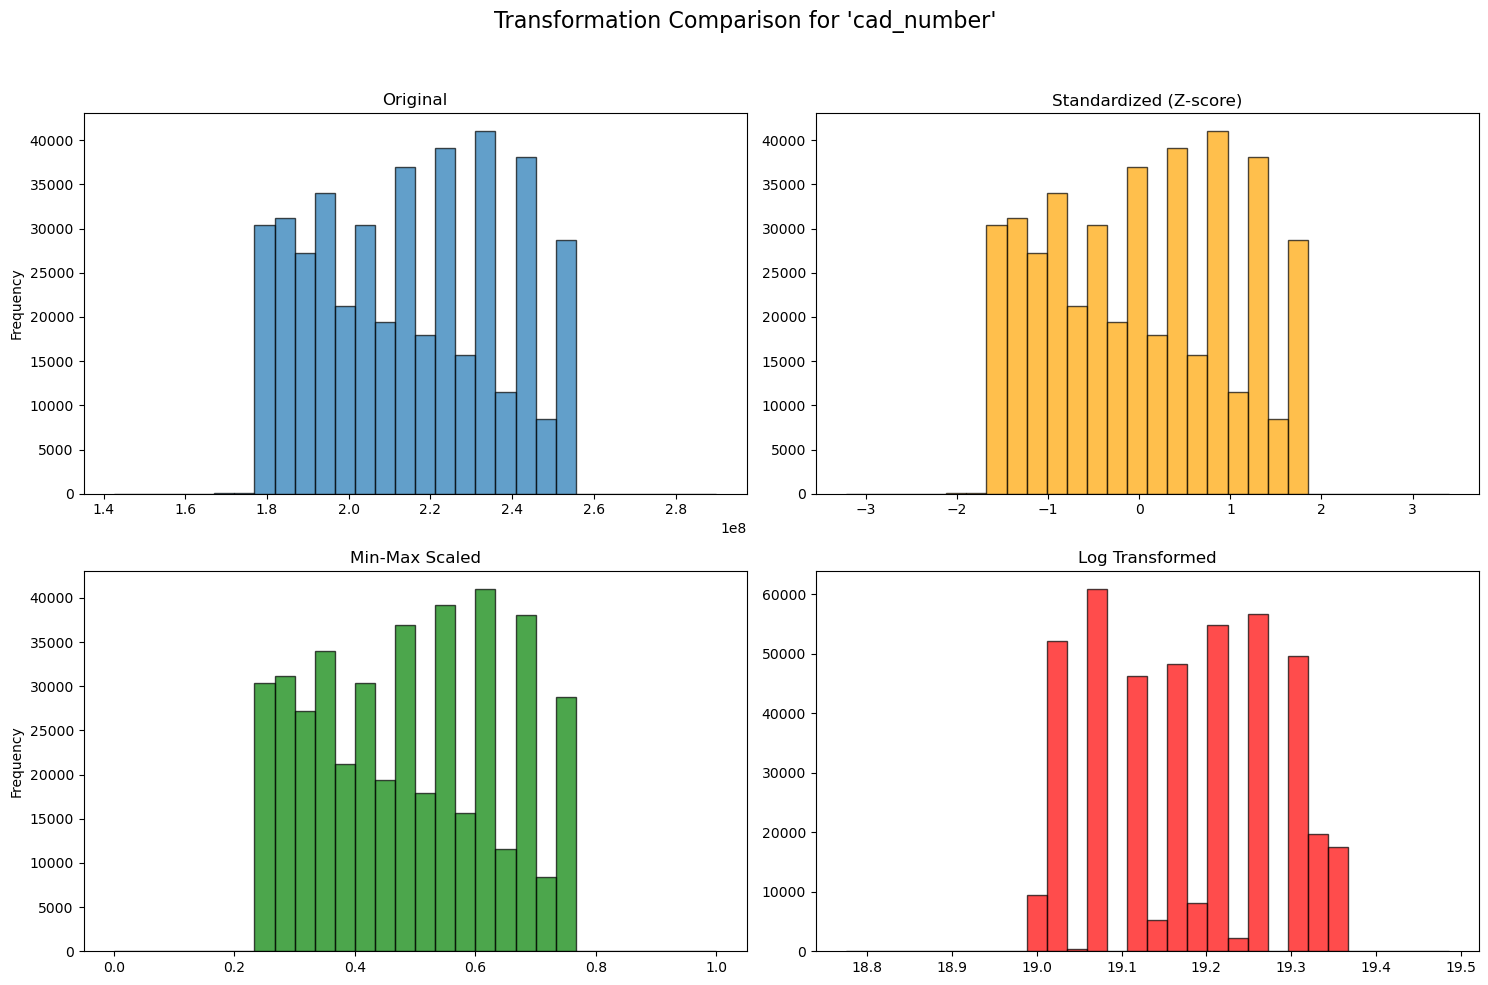



--- Transformation Effects for 'cnn' ---
------------------------------------------------------------
                      Mean           Std           Min           Max  Skewness
Original      2.465327e+07  1.516263e+06  2.062600e+07  2.824500e+07 -0.774806
Standardized  3.965161e-17  1.000001e+00 -2.656055e+00  2.368805e+00 -0.774806
MinMax        5.285829e-01  1.990108e-01  0.000000e+00  1.000000e+00 -0.774806
Log           1.701846e+01  6.332512e-02  1.684206e+01  1.715643e+01 -0.955441


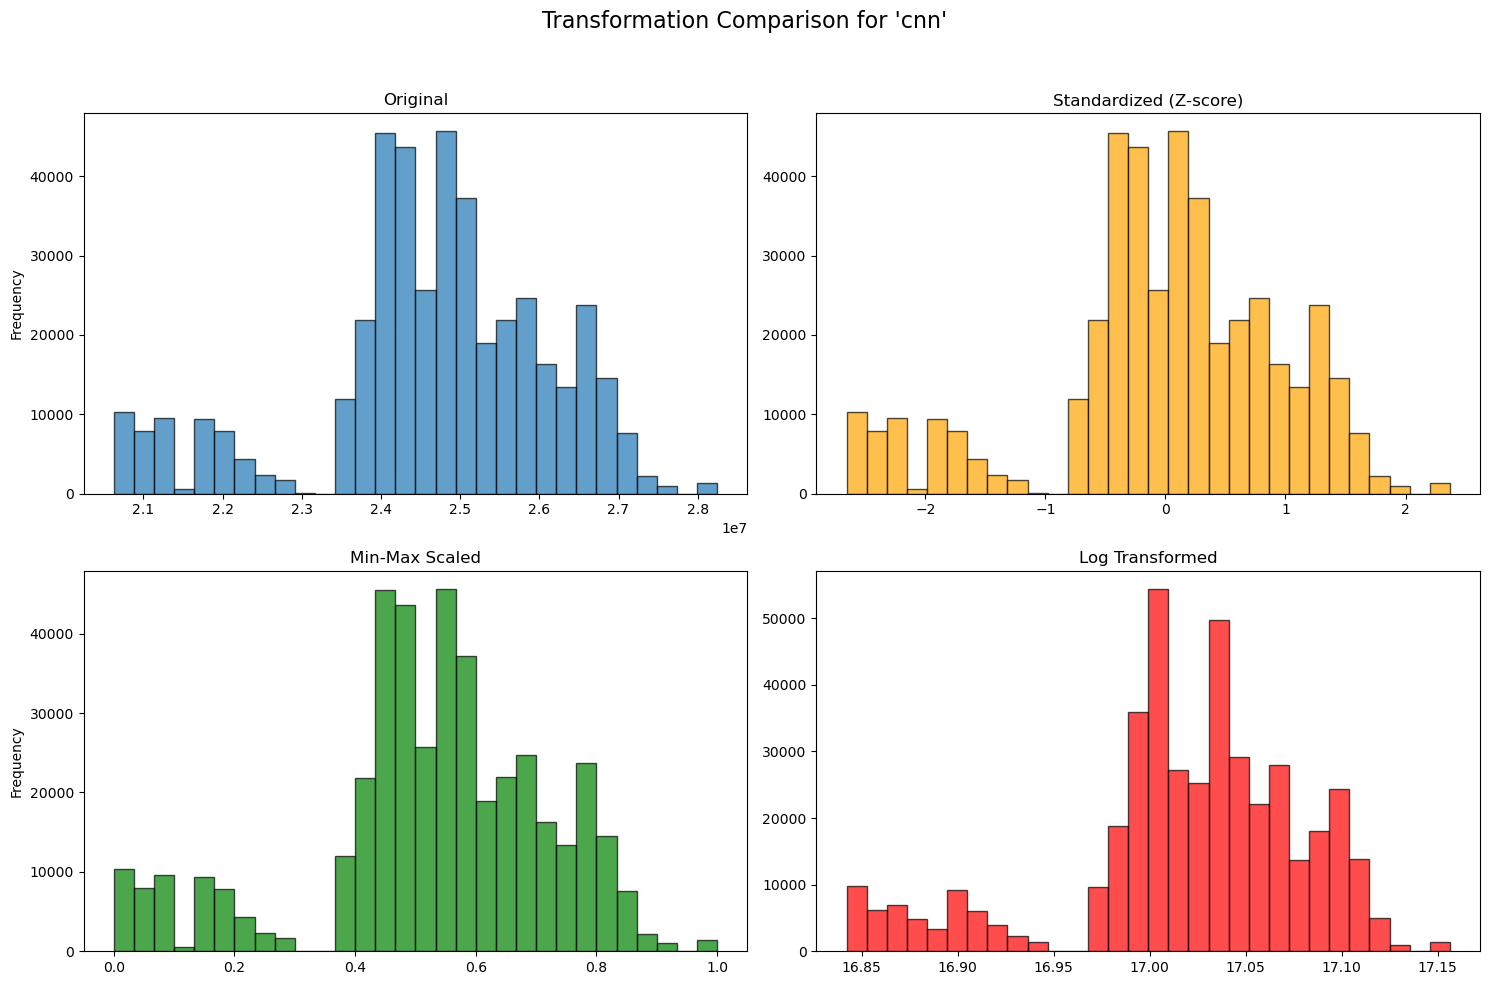



--- Transformation Effects for 'supervisor_district' ---
------------------------------------------------------------
                      Mean       Std       Min        Max  Skewness
Original      5.892734e+00  2.616750  1.000000  11.000000  0.137665
Standardized -1.283079e-16  1.000001 -1.869777   1.951761  0.137665
MinMax        4.892734e-01  0.261675  0.000000   1.000000  0.137665
Log           1.849033e+00  0.419567  0.693147   2.484907 -0.484594


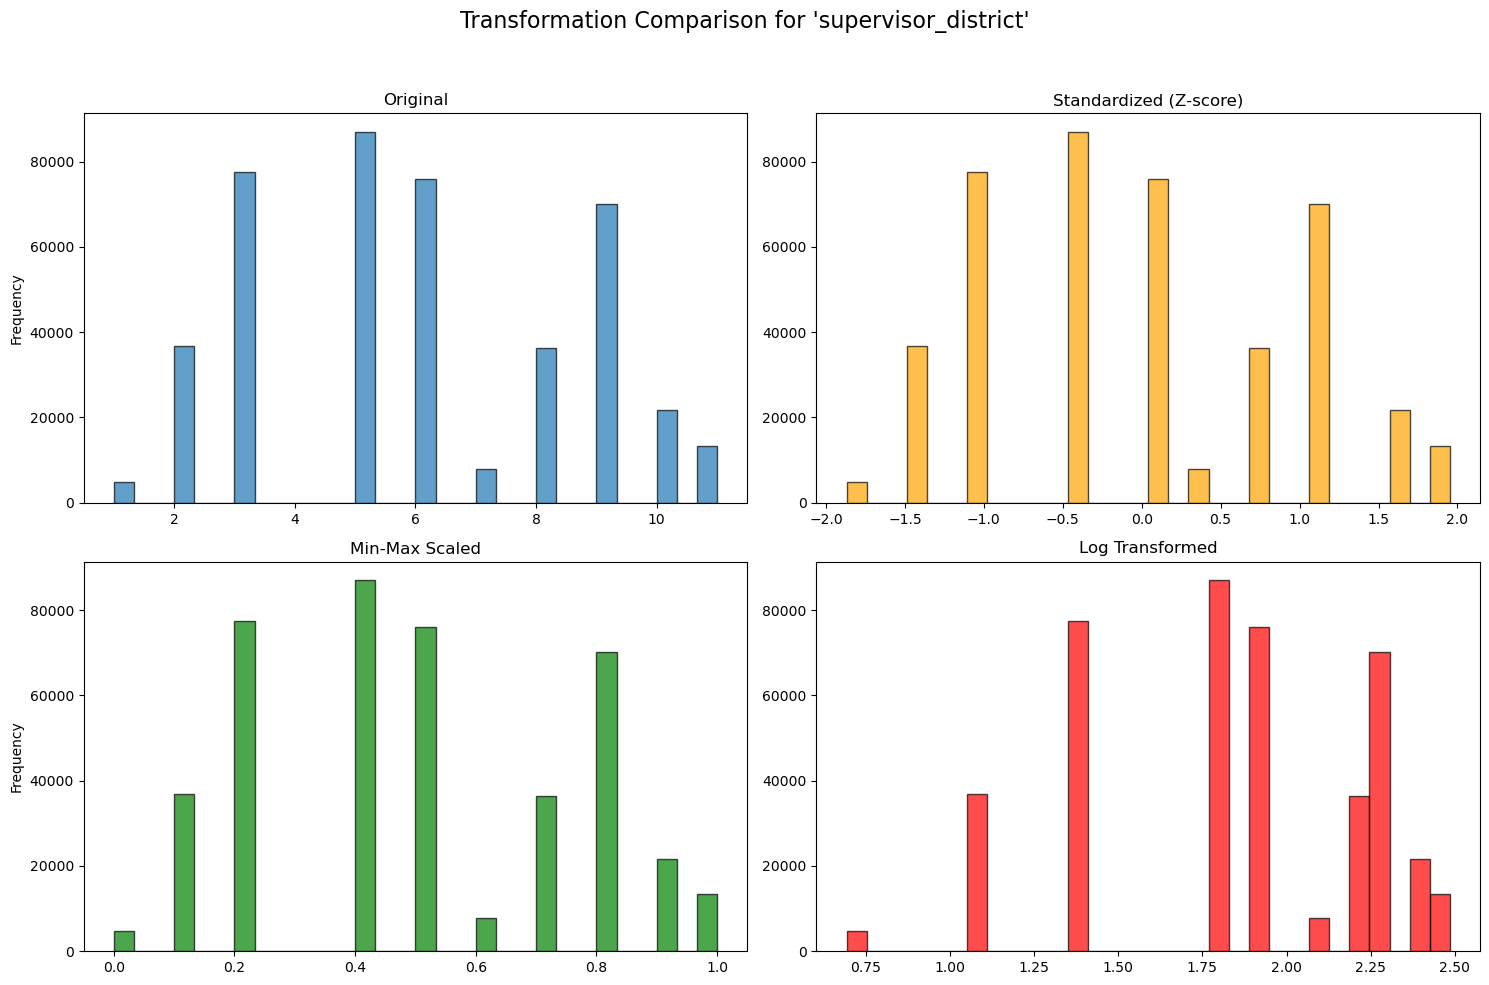



--- Transformation Effects for 'latitude' ---
------------------------------------------------------------
                      Mean       Std        Min        Max  Skewness
Original      3.777391e+01  0.019824  37.720726  37.808212 -0.712553
Standardized -3.283565e-14  1.000001  -2.682693   1.730471 -0.712553
MinMax        6.078843e-01  0.226595   0.000000   1.000000 -0.712553
Log           3.657747e+00  0.000511   3.656375   3.658632 -0.713698


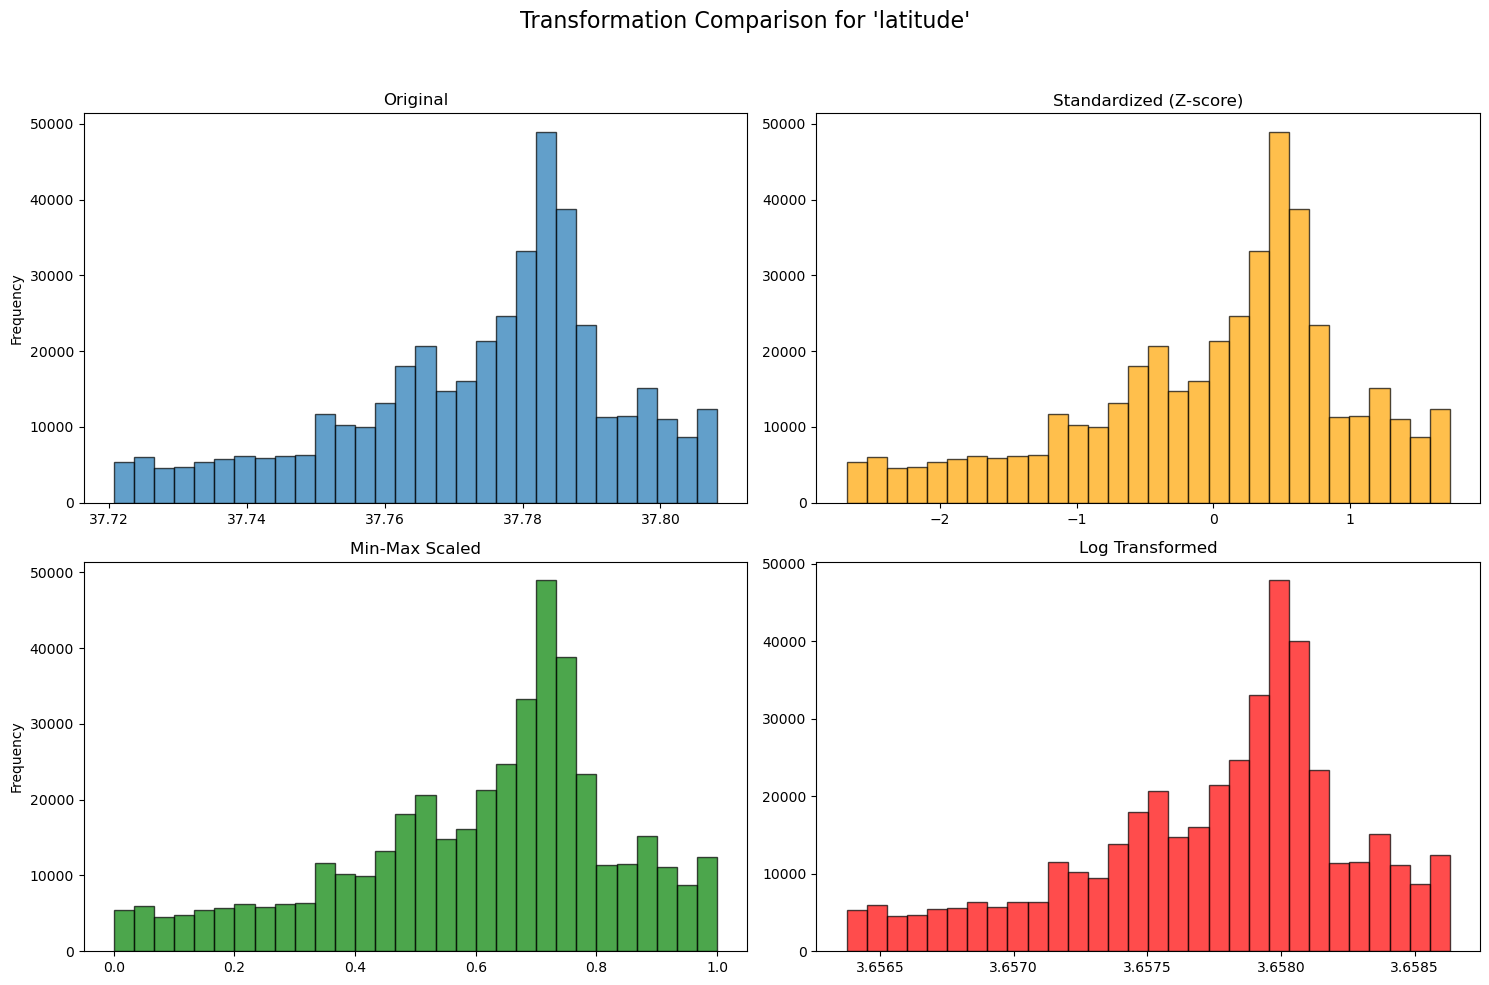



--- Transformation Effects for 'longitude' ---
------------------------------------------------------------
                      Mean       Std         Min         Max  Skewness
Original     -1.224189e+02  0.015529 -122.464012 -122.382690 -0.592035
Standardized  2.092061e-14  1.000001   -2.908016    2.328847 -0.592035
MinMax        5.552973e-01  0.190954    0.000000    1.000000 -0.592035


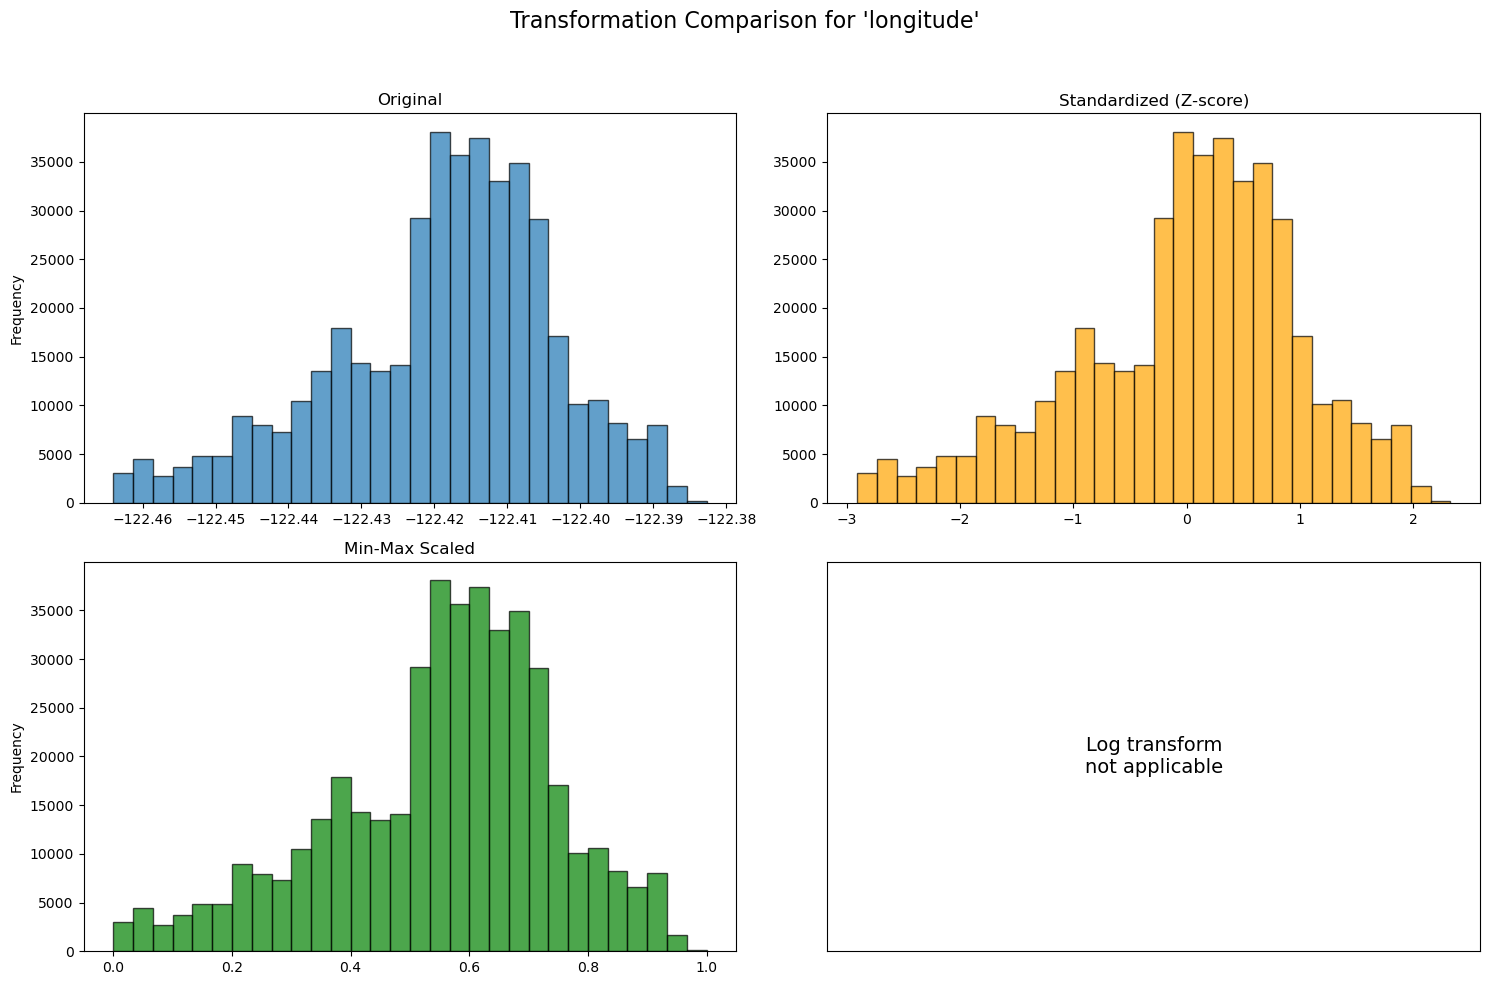

In [40]:
# Create transformed versions of numerical features
print("\nApplying transformations to numerical features...")

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Create new dataframe for transformed features
df_transformed = df.copy()

# Apply transformations
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        # Handle missing values by filling with median
        col_data = df[[col]].fillna(df[col].median())
        
        # 1. Standard Scaling (Z-score normalization)
        df_transformed[f'{col}_standardized'] = standard_scaler.fit_transform(col_data)
        
        # 2. Min-Max Scaling
        df_transformed[f'{col}_minmax'] = minmax_scaler.fit_transform(col_data)
        
        # 3. Log transformation (if all values are positive)
        if (df[col] > 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])
        
        # 4. Square root transformation (if all values are positive)
        if (df[col] >= 0).all():
            df_transformed[f'{col}_sqrt'] = np.sqrt(df[col])

print(f"\n✓ Created {len(df_transformed.columns) - len(df.columns)} transformed features")

# Show transformation effects
if len(numerical_cols) > 0:
    sample_col = numerical_cols[0]
    
    print(f"\nTransformation Effects for '{sample_col}':")
    print("-" * 60)
    
    transformations = {
        'Original': df[sample_col],
        'Standardized': df_transformed[f'{sample_col}_standardized'],
        'MinMax': df_transformed[f'{sample_col}_minmax']
    }
    
    if f'{sample_col}_log' in df_transformed.columns:
        transformations['Log'] = df_transformed[f'{sample_col}_log']
    
    stats_comparison = pd.DataFrame({
        name: {
            'Mean': data.mean(),
            'Std': data.std(),
            'Min': data.min(),
            'Max': data.max(),
            'Skewness': data.skew()
        }
        for name, data in transformations.items()
    }).T
    
    print(stats_comparison)

# Visualize transformation effects
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for sample_col in numerical_cols:
        print(f"\n\n--- Transformation Effects for '{sample_col}' ---")
        print("-" * 60)
        
        # --- Build the statistics table for the current column ---
        transformations = {
            'Original': df[sample_col],
            'Standardized': df_transformed[f'{sample_col}_standardized'],
            'MinMax': df_transformed[f'{sample_col}_minmax']
        }
        
        # Add log transformation if it exists for this column
        if f'{sample_col}_log' in df_transformed.columns:
            transformations['Log'] = df_transformed[f'{sample_col}_log']
        
        stats_comparison = pd.DataFrame({
            name: {
                'Mean': data.mean(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Skewness': data.skew()
            }
            for name, data in transformations.items()
        }).T
        
        print(stats_comparison)

        # --- Visualize the transformation effects for the current column ---
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f"Transformation Comparison for '{sample_col}'", fontsize=16)

        # Original
        axes[0, 0].hist(df[sample_col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, 0].set_title('Original')
        axes[0, 0].set_ylabel('Frequency')
        
        # Standardized
        axes[0, 1].hist(df_transformed[f'{sample_col}_standardized'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='orange')
        axes[0, 1].set_title('Standardized (Z-score)')
        
        # MinMax
        axes[1, 0].hist(df_transformed[f'{sample_col}_minmax'].dropna(), 
                        bins=30, edgecolor='black', alpha=0.7, color='green')
        axes[1, 0].set_title('Min-Max Scaled')
        axes[1, 0].set_ylabel('Frequency')
        
        # Log (if exists)
        if f'{sample_col}_log' in df_transformed.columns:
            axes[1, 1].hist(df_transformed[f'{sample_col}_log'].dropna(), 
                            bins=30, edgecolor='black', alpha=0.7, color='red')
            axes[1, 1].set_title('Log Transformed')
        else:
            axes[1, 1].text(0.5, 0.5, 'Log transform\nnot applicable', 
                        ha='center', va='center', fontsize=14)
            axes[1, 1].set_xticks([])
            axes[1, 1].set_yticks([])
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

**Visualizations**

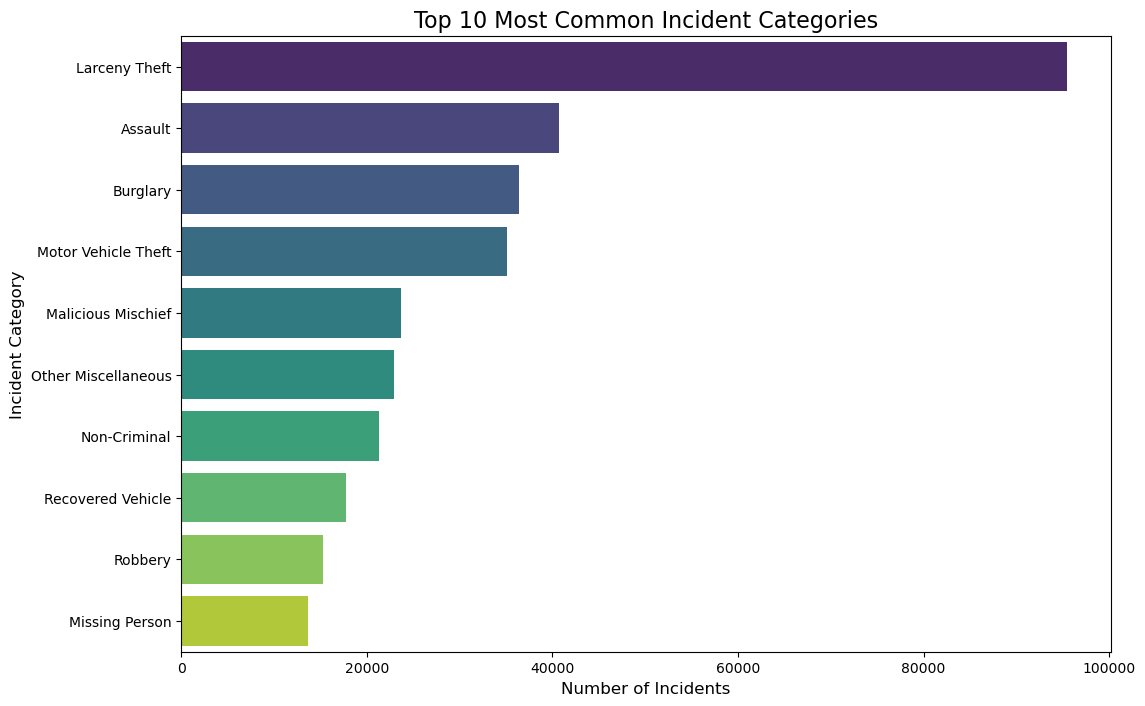

In [41]:
# 1. Top 10 Incident Categories
plt.figure(figsize=(12, 8))
top_10_incidents = df['incident_category'].value_counts().nlargest(10)
sns.barplot(y=top_10_incidents.index, x=top_10_incidents.values, palette='viridis')
plt.title('Top 10 Most Common Incident Categories', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Incident Category', fontsize=12)
plt.show()

Insight: The chart clearly indicates that "Larceny/Theft" is by far the most common category of reported incidents, followed by other categories like "Burglary" and "Assault". This suggests that property crime is a primary concern in the city based on reported data.

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


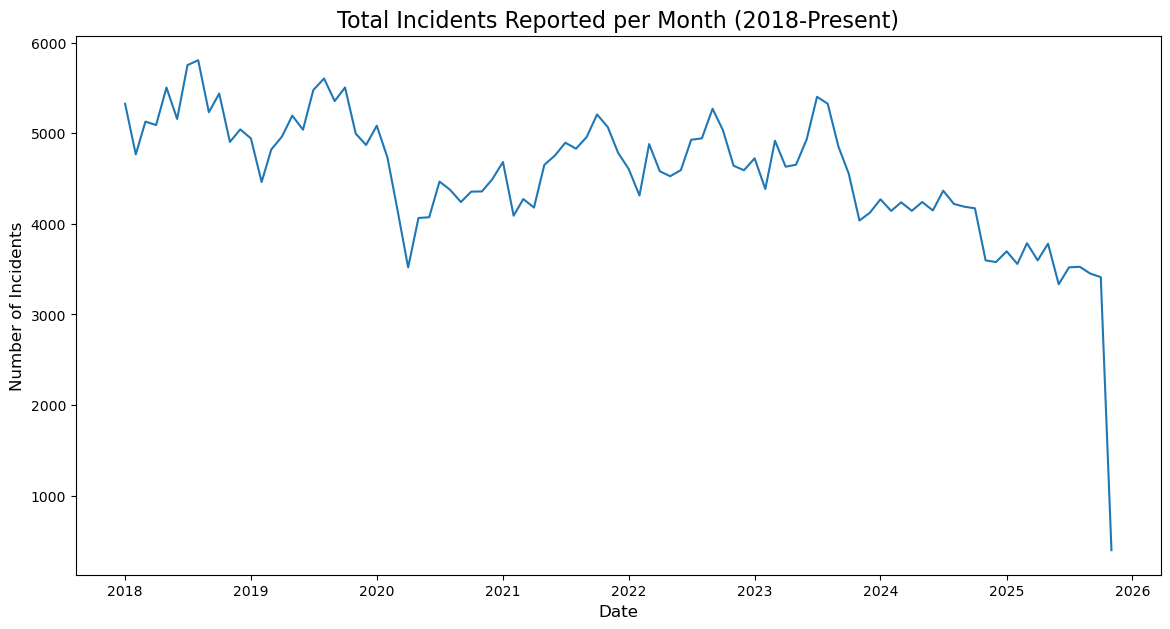

In [42]:
# 2. Incidents Over Time (Monthly Trend)
df['incident_month'] = df['incident_datetime'].dt.to_period('M')
monthly_incidents = df.groupby('incident_month').size()
monthly_incidents.index = monthly_incidents.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_incidents.index, y=monthly_incidents.values)
plt.title('Total Incidents Reported per Month (2018-Present)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.show()

Insight: The trend line shows notable fluctuations. You can likely observe a significant dip in reported incidents around early 2020, which corresponds with the start of COVID-19 lockdowns. Analyzing the trend before and after this period can provide insights into how public behavior and policing practices have changed.

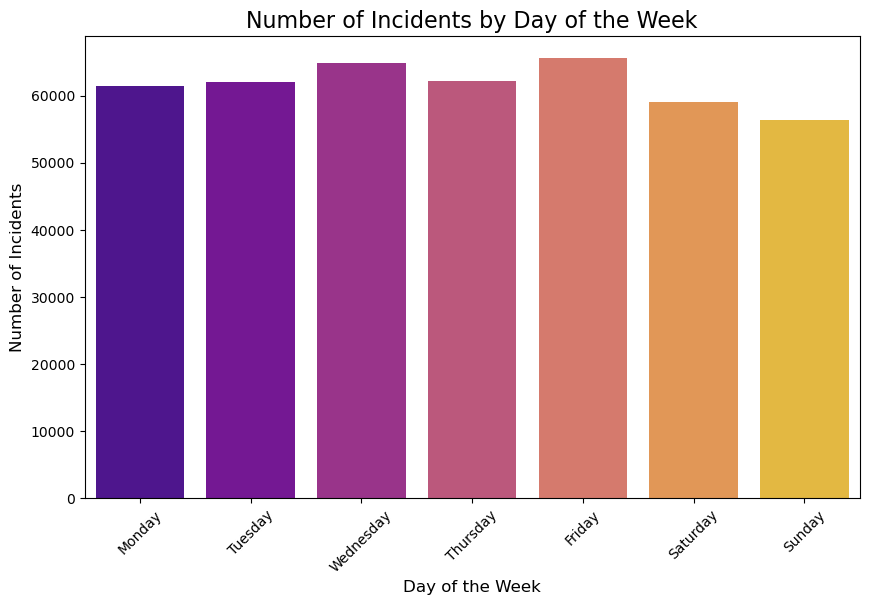

In [43]:
# 3. Incidents by Day of the Week
plt.figure(figsize=(10, 6))
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='incident_day_of_week', data=df, order=days_order, palette='plasma')
plt.title('Number of Incidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: Incidents appear to be highest on Fridays, and Wednesdays and lowest on Sundays

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


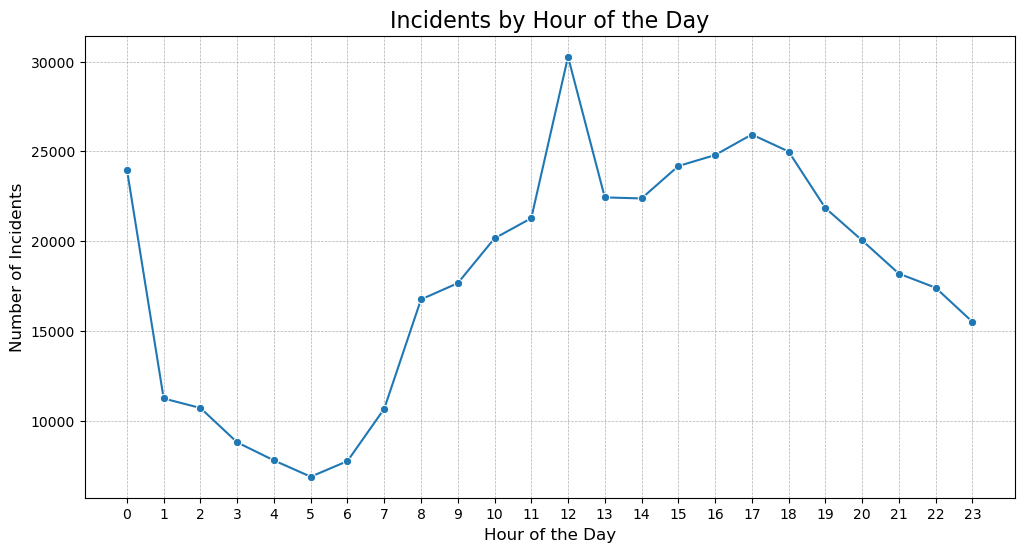

In [44]:
# 4. Incidents by Hour of the Day
plt.figure(figsize=(12, 6))
hourly_incidents = df.groupby(df['incident_datetime'].dt.hour).size()
sns.lineplot(x=hourly_incidents.index, y=hourly_incidents.values, marker='o')
plt.title('Incidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Insight: The data shows a clear pattern: incidents are lowest in the early morning hours (around 5AM) and begin to rise throughout the day, peaking in the late afternoon (areound 12PM) and evening (5-7PM)

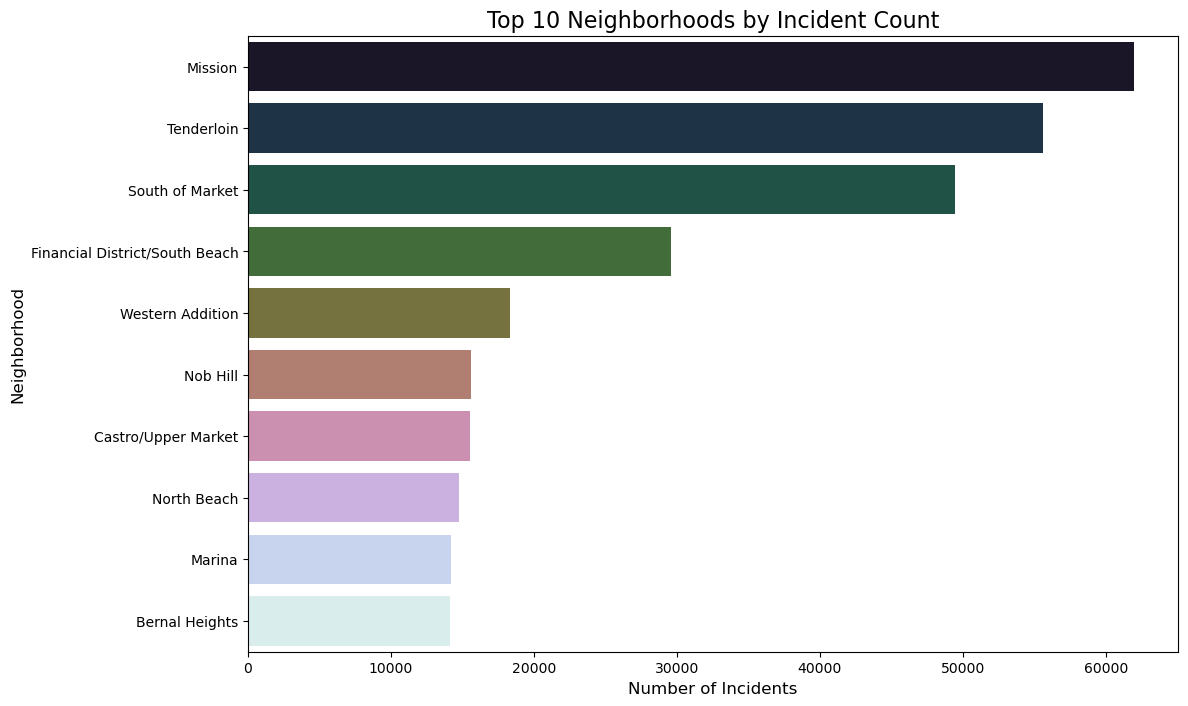

In [45]:
# 5. Top 10 Neighborhoods by Incident Count
plt.figure(figsize=(12, 8))
top_10_neighborhoods = df['analysis_neighborhood'].value_counts().nlargest(10)
sns.barplot(y=top_10_neighborhoods.index, x=top_10_neighborhoods.values, palette='cubehelix')
plt.title('Top 10 Neighborhoods by Incident Count', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

Insight: Neighborhoods like Mission, Tenderloin, and South of Market consistently rank as having the highest number of reported incidents. These are densely populated, commercially active areas, which often correlates with higher crime volumes.

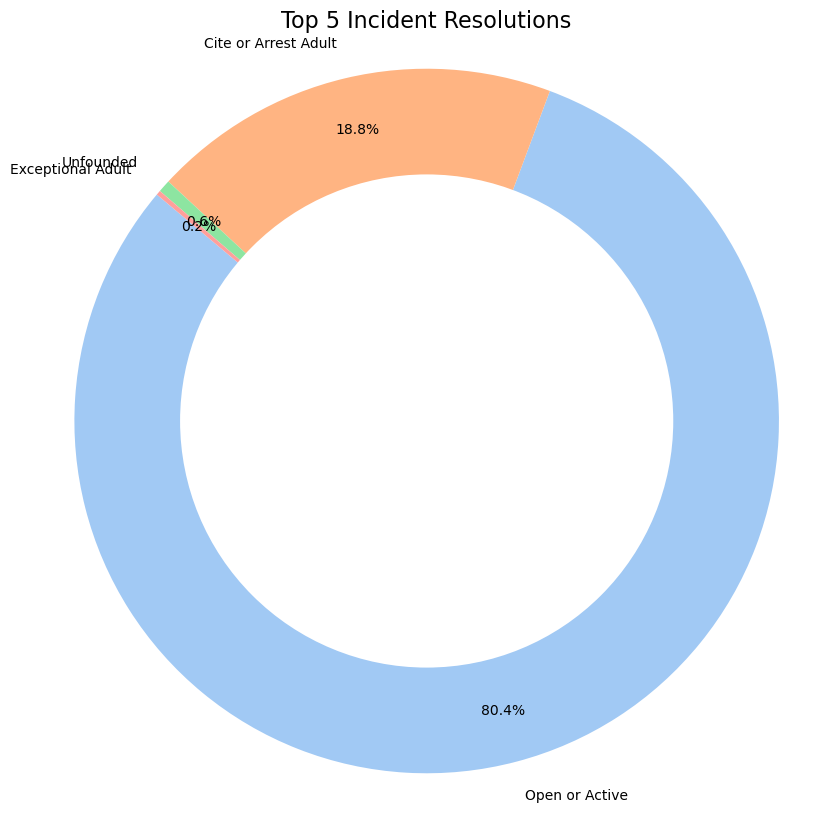

In [46]:
# 6. Incident Resolutions
plt.figure(figsize=(10, 10))
resolution_counts = df['resolution'].value_counts().nlargest(5)

# Create a donut chart
plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=140, 
        pctdistance=0.85, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 5 Incident Resolutions', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Insight: A significant portion of cases result in a citation or arrest. However, a large number also remain "Open or Active," indicating that many reported incidents are not immediately resolved. This highlights the ongoing nature of police casework.

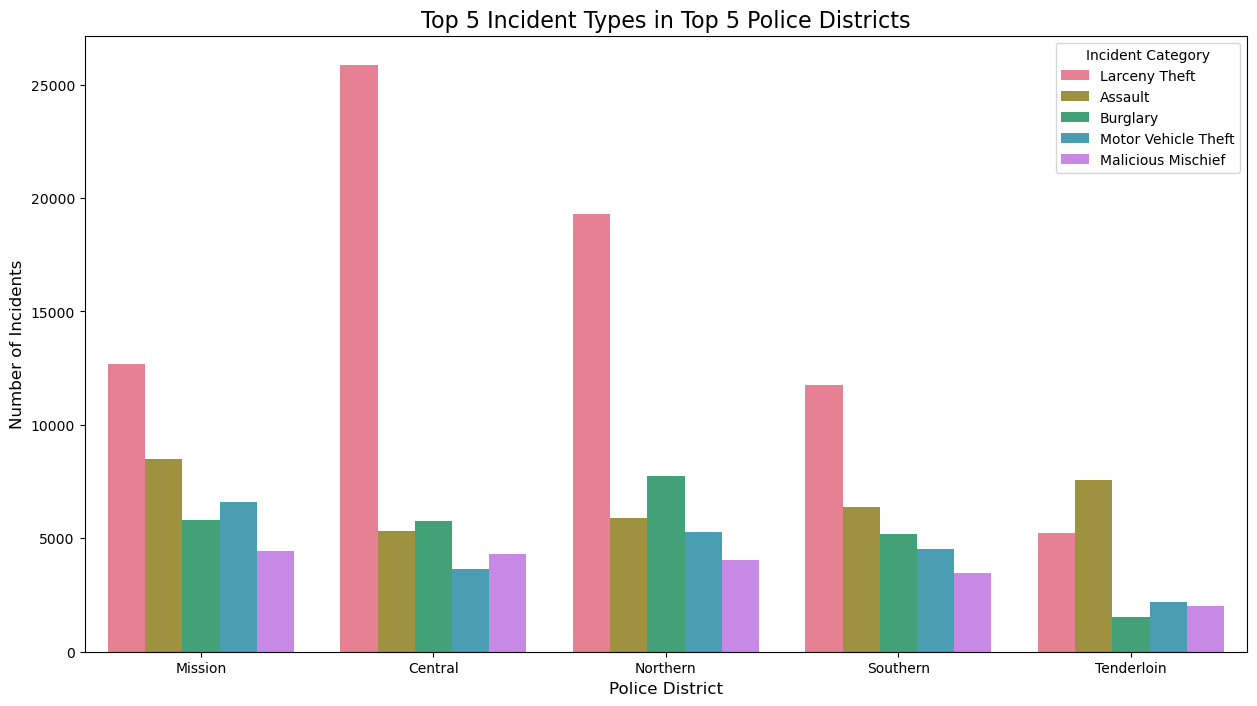

In [47]:
# 7. Top 5 Incident Types in Top 5 Districts
top_districts = df['police_district'].value_counts().nlargest(5).index
top_categories = df['incident_category'].value_counts().nlargest(5).index

# Filter data for top districts and categories
filtered_df = df[df['police_district'].isin(top_districts) & df['incident_category'].isin(top_categories)]

plt.figure(figsize=(15, 8))
sns.countplot(x='police_district', hue='incident_category', data=filtered_df, 
              order=top_districts, hue_order=top_categories, palette='husl')
plt.title('Top 5 Incident Types in Top 5 Police Districts', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.legend(title='Incident Category')
plt.show()

Insight: While "Larceny/Theft" is the dominant category across all top districts, the proportions of other crimes vary. For example, the Central and Southern districts show a very high volume of larceny compared to other crimes, indicating a strong focus on property crime in those areas.

In [48]:
# 8. Hierarchy of Crime (Treemap)
# Get the top 15 categories for clarity
import plotly.express as px
top_categories_for_treemap = df['incident_category'].value_counts().nlargest(15).index
treemap_df = df[df['incident_category'].isin(top_categories_for_treemap)]

# Group data for the treemap
treemap_data = treemap_df.groupby(['incident_category', 'incident_subcategory']).size().reset_index(name='count')

fig = px.treemap(treemap_data, 
                 path=['incident_category', 'incident_subcategory'], 
                 values='count',
                 title='Hierarchical View of Incident Categories and Subcategories',
                 color_continuous_scale='YlOrRd')
fig.show()

Insight: This interactive treemap provides a rich, detailed view of the data. You can immediately see that within the large "Larceny/Theft" category, "Grand Theft from Locked Auto" and "Petty Theft from Locked Auto" are massive sub-categories. This immediately pinpoints vehicle break-ins as a major component of the city's primary crime problem. You can hover over different blocks to explore the hierarchy in detail.

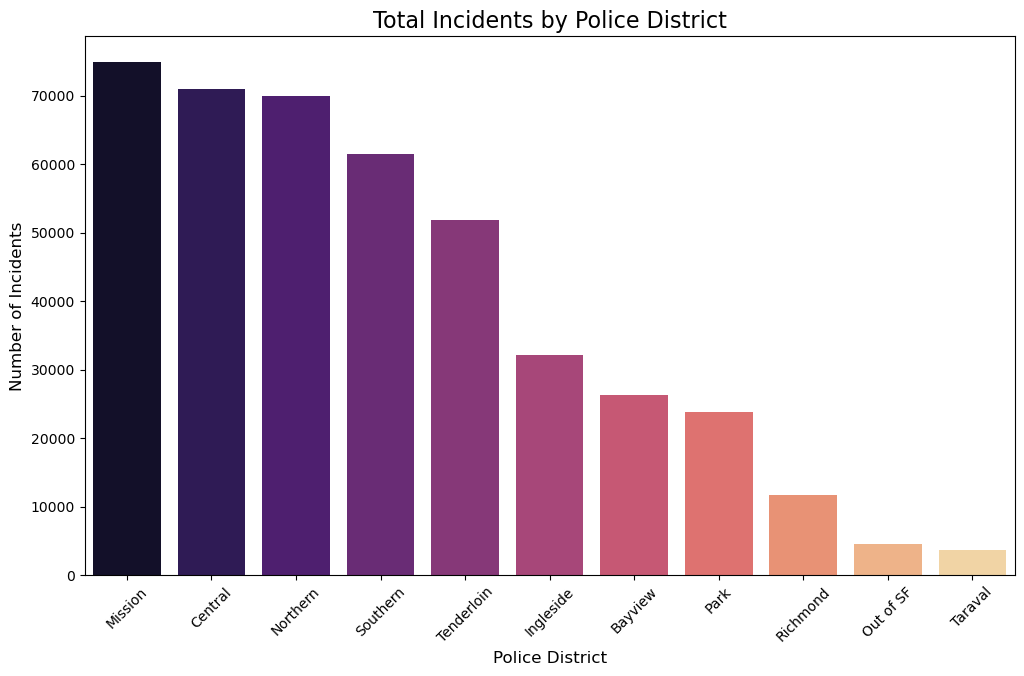

In [49]:
# 9. Incidents by Police District
plt.figure(figsize=(12, 7))
district_counts = df['police_district'].value_counts()
sns.barplot(x=district_counts.index, y=district_counts.values, palette='magma', order=district_counts.index)
plt.title('Total Incidents by Police District', fontsize=16)
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Insight: The Southern, Mission, and Central districts report the highest number of incidents. These districts cover the dense downtown, SoMa, and Mission areas, which aligns with our previous neighborhood and heatmap analyses.

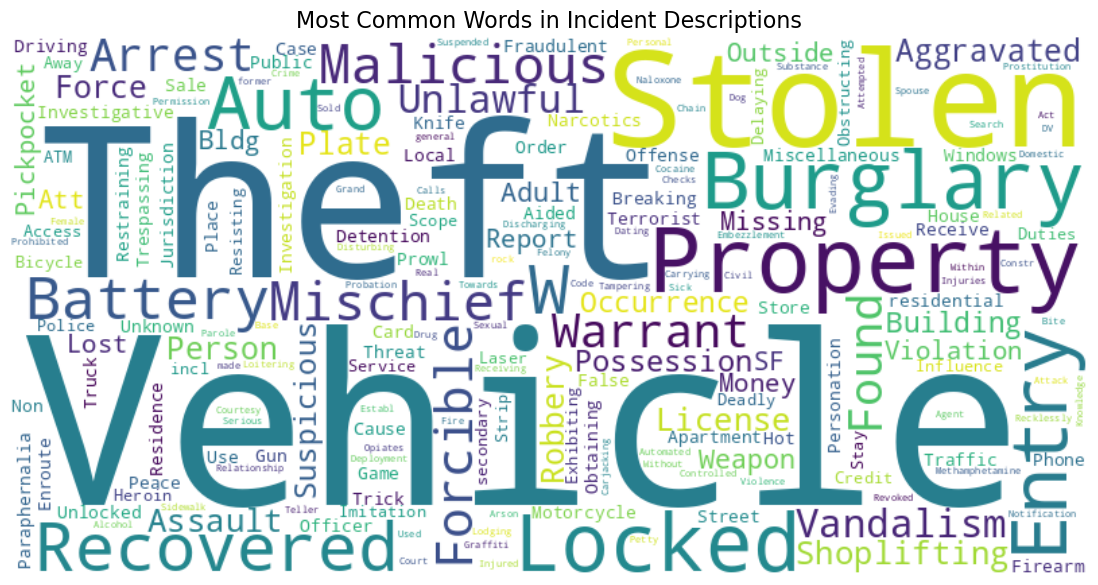

In [50]:
from wordcloud import WordCloud

# 10. Word Cloud of Incident Descriptions
# Concatenate all descriptions into a single string
text = " ".join(desc for desc in df['incident_description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',
    collocations=False # Avoids grouping common word pairs
).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Incident Descriptions', fontsize=16)
plt.show()

Insight: The word cloud immediately highlights the most prominent terms used in police reports. Words like "THEFT," "VEHICLE," "LOCKED," "AUTO," "ATTEMPTED," and "VANDALISM" will likely appear very large. This provides a quick, visceral confirmation that vehicle-related property crime is a dominant theme in the dataset, reinforcing the findings from the bar charts and treemap in a visually compelling way.

MILESTONE 3

FREQUENT PATTERN MINING

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# --- CRITICAL ASSUMPTION ---
# Assuming 'df' is your cleaned DataFrame with columns:
# 'police_district', 'incident_date', and 'incident_category'.
# If you don't have a 'df', replace the next line with your data loading/cleaning.
# Example: df = pd.read_csv('your_cleaned_crime_data.csv')

# 1. Create a composite Transaction ID (District + Date)
df['transaction_id'] = df['police_district'].astype(str) + '_' + df['incident_date'].astype(str)

# 2. Group by Transaction ID and Incident Category, and count occurrences
# The unstack(fill_value=0) operation pivots the data, creating the matrix.
basket = (
    df.groupby(['transaction_id', 'incident_category'])['incident_id']
    .count()
    .unstack(fill_value=0)
)

# 3. Convert counts to binary presence/absence (1 or 0)
def encode_units(x):
    # If the crime occurred (count >= 1), mark as 1 (present). Otherwise, 0 (absent).
    return 1 if x >= 1 else 0

basket_sets = basket.applymap(encode_units)

print("✅ Data Preparation Complete.")
print(f"Total Transactions (District-Day Combinations): {basket_sets.shape[0]}")
print("Sample of the Transaction Matrix (First 5 Transactions and First 5 Crime Types):")
print(basket_sets.iloc[:, :5].head())

C:\Users\siddh\AppData\Local\Temp\ipykernel_41960\4192424660.py:27: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



✅ Data Preparation Complete.
Total Transactions (District-Day Combinations): 29833
Sample of the Transaction Matrix (First 5 Transactions and First 5 Crime Types):
incident_category                Arson  Assault  Burglary  Case Closure  \
transaction_id                                                            
Bayview_2018-01-01T00:00:00.000      0        1         0             0   
Bayview_2018-01-02T00:00:00.000      0        0         0             0   
Bayview_2018-01-03T00:00:00.000      0        1         1             0   
Bayview_2018-01-04T00:00:00.000      0        0         0             0   
Bayview_2018-01-05T00:00:00.000      0        1         1             0   

incident_category                Civil Sidewalks  
transaction_id                                    
Bayview_2018-01-01T00:00:00.000                0  
Bayview_2018-01-02T00:00:00.000                0  
Bayview_2018-01-03T00:00:00.000                0  
Bayview_2018-01-04T00:00:00.000                0  
Bayv

In [53]:
# Try a higher minimum support, e.g., 0.01 (1.0%)
MIN_SUPPORT = 0.01

frequent_itemsets = apriori(
    basket_sets,
    min_support=MIN_SUPPORT,
    use_colnames=True,
    # 💥 CRITICAL FIX: Add the low_memory flag to reduce RAM usage
    low_memory=True
)

# Add a column for the length of the itemset (how many crimes are co-occurring)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Sort the results
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print(f"\n✅ Found {len(frequent_itemsets)} Frequent Itemsets with Support > {MIN_SUPPORT}")
print("Top 10 Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support', 'length']].head(10))

c:\Users\siddh\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type




✅ Found 39507 Frequent Itemsets with Support > 0.01
Top 10 Frequent Itemsets:
                                 itemsets   support  length
11                        (Larceny Theft)  0.783562       1
16                  (Motor Vehicle Theft)  0.594308       1
1                               (Assault)  0.588476       1
2                              (Burglary)  0.569068       1
62               (Larceny Theft, Assault)  0.521771       2
217  (Motor Vehicle Theft, Larceny Theft)  0.512788       2
91              (Burglary, Larceny Theft)  0.504307       2
13                   (Malicious Mischief)  0.469447       1
20                  (Other Miscellaneous)  0.442999       1
17                         (Non-Criminal)  0.441960       1


In [54]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd # Import pandas if not already done

# Set thresholds for rule generation
MIN_CONFIDENCE = 0.3
MIN_LIFT = 1.2 # We want a reasonably strong positive correlation

# Assumes 'frequent_itemsets' is available from the Apriori step

rules = association_rules(
    frequent_itemsets,
    metric="lift",
    min_threshold=MIN_LIFT
)

# Filter rules further by a minimum confidence
rules = rules[rules['confidence'] >= MIN_CONFIDENCE]

# Sort the rules by Lift (highest is the most interesting)
rules = rules.sort_values(['lift', 'confidence'], ascending=[False, False])

# --- CRITICAL FIX START ---

# 1. Format the output for better readability (converts frozenset to string)
# This MUST happen before filtering by string length!
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '. join(list(x)))

# 2. Define the function to count items in the formatted string
def get_item_count(rule_string):
    # If the string is empty or not a string, return 0
    if not isinstance(rule_string, str) or not rule_string:
        return 0
    # The number of items is the count of separators (', ') plus one
    return rule_string.count(', ') + 1

# 3. Filter for rules involving only 1 or 2 items on each side
simple_rules = rules[
    (rules['antecedents'].apply(get_item_count) <= 2) &
    (rules['consequents'].apply(get_item_count) <= 2)
]

# --- CRITICAL FIX END ---
print(f"\n✅ Found {len(simple_rules)} Strong Association Rules (Lift >= {MIN_LIFT} and Confidence >= {MIN_CONFIDENCE})")
print("\nTop 10 Simple (Length <= 2) Rules:")
print(simple_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


✅ Found 16416 Strong Association Rules (Lift >= 1.2 and Confidence >= 0.3)

Top 10 Simple (Length <= 2) Rules:
                                    antecedents  \
2072623            Other Offenses, Drug Offense   
1579451  Drug Offense, Traffic Violation Arrest   
2114908           Warrant, Weapons Carrying Etc   
852917   Drug Offense, Traffic Violation Arrest   
351580                           Other, Warrant   
291860                           Warrant, Other   
2114911      Weapons Carrying Etc, Drug Offense   
1351636                Warrant, Weapons Offense   
281407              Warrant, Disorderly Conduct   
177438                           Other, Warrant   

                               consequents   support  confidence      lift  
2072623         Warrant, Recovered Vehicle  0.011162    0.321119  2.680451  
1579451                   Warrant, Robbery  0.012671    0.312397  2.658982  
2114908              Drug Offense, Assault  0.011062    0.502283  2.616942  
852917        Warr

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Visualization Setup ---

# Plot a random sample of the strong rules to keep the plot readable and fast
# We use a sample of 10,000 rules, which is enough to see the distribution.
rules_sample = rules.sample(n=10000, random_state=42)

# Set the style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Create the scatter plot
# X-axis: Confidence (reliability)
# Y-axis: Lift (strength)
# Color: Support (frequency)
scatter = sns.scatterplot(
    x='confidence',
    y='lift',
    data=rules_sample,
    hue='support',       # Color points based on Support
    size='support',      # Size points based on Support
    palette='viridis',   # Use a perceptually uniform colormap
    sizes=(20, 200),     # Define the range of point sizes
    alpha=0.6            # Set transparency
)

# Add a horizontal line at Lift = 1.0 (no correlation)
plt.axhline(y=1.0, color='r', linestyle='--', linewidth=1)

# Set labels and title
plt.xlabel("Confidence (P(Consequent | Antecedent))", fontsize=12)
plt.ylabel("Lift", fontsize=12)
plt.title(f"Association Rules Scatter Plot (Sampled {len(rules_sample):,} Rules)", fontsize=14)

# Move the legend outside the plot
plt.legend(title='Support', loc='upper left', bbox_to_anchor=(1.05, 1))

# Save the figure
plt.savefig("apriori_scatter_plot.png", bbox_inches='tight')
plt.close()

print("✅ Scatter Plot generated and saved as apriori_scatter_plot.png")

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

c:\Users\siddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



✅ Scatter Plot generated and saved as apriori_scatter_plot.png


The Frequent Pattern Mining analysis, utilizing the Apriori algorithm on District-Day transactions, revealed a dual nature in crime co-occurrence: a high volume of weak associations and a few key actionable patterns. The scatter plot confirms that while a large majority of rules show only marginal strength ($\text{Lift} \approx 1.0-1.25$), the most significant insights come from a rare subset of highly correlated events ($\text{Lift} > 2.5$). Specifically, the strong, simple rules (e.g., Warrant, Weapons Carrying $\to$ Drug Offense, Assault) highlight a critical operational link, indicating that police response to crimes involving weapons or drug violations is highly likely ($\text{Confidence} > 50\%$) to uncover outstanding Warrants and result in an Assault charge, often due to escalation or resistance. This suggests targeted policing efforts, particularly traffic stops and responses to initial calls, are highly effective in identifying subjects involved in multiple, compounding criminal activities.

CLUSTERING (K-MEANS)

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore')

FILE_NAME = 'police_data_step1_cleaned.csv'

try:
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"FATAL ERROR: Could not load '{FILE_NAME}'.")
    raise

print("=" * 100)
print("🗺️  CLUSTERING TASK: FINDING GEOGRAPHIC HOTSPOTS")
print("=" * 100)

# --- STEP 1: PREPARE DATA FOR CLUSTERING ---
print("\n🔧 Step 1: Prepare Data")

# Select only the relevant features
features = ['latitude', 'longitude']
df_geo = df[features].dropna().copy()

print(f"Original rows: {len(df):,}")
print(f"Rows after dropping NaNs: {len(df_geo):,}")

# --- SAMPLING (IMPORTANT!) ---
# Clustering all 380k+ points can be very slow.
# We'll take a large random sample to speed up the process.
# 50,000 points is usually enough to see the patterns.
if len(df_geo) > 50000:
    df_geo_sample = df_geo.sample(n=50000, random_state=42)
else:
    df_geo_sample = df_geo.copy()

print(f"Using {len(df_geo_sample):,} samples for clustering.")

# --- SCALING (CRITICAL!) ---
# Both K-Means and DBSCAN are distance-based, so features must be scaled.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_geo_sample)

print("Data has been scaled.")

# ==============================================================================
#  METHOD 1: K-MEANS CLUSTERING (Finding 'k' Centers)
# ==============================================================================

print("\n" + "=" * 100)
print("✨ METHOD 1: K-Means Clustering")
print("=" * 100)

# --- STEP 2A: FIND OPTIMAL 'k' WITH THE ELBOW METHOD ---
print("\n📊 Step 2a: Finding optimal 'k' with the Elbow Method...")
inertia = []
k_range = range(2, 11) # Check for 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('kmeans_elbow_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("✅ Saved: kmeans_elbow_plot.png")

# --- STEP 2B: RUN K-MEANS WITH CHOSEN 'k' ---
# Let's assume the elbow plot suggests k=6 (a common result for SF)
chosen_k = 3
print(f"\n⚙️  Step 2b: Running K-Means with k={chosen_k}...")

kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)
df_geo_sample['kmeans_cluster'] = kmeans.labels_

# --- STEP 2C: VISUALIZE K-MEANS ---
print("\n🎨 Step 2c: Visualizing K-Means clusters...")
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_geo_sample,
    x='longitude',
    y='latitude',
    hue='kmeans_cluster',
    palette='viridis',
    s=10, # Make points small
    alpha=0.7
)
# Plot the centroids
centroids_scaled = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids_scaled)
plt.scatter(
    centroids_unscaled[:, 1], 
    centroids_unscaled[:, 0], 
    marker='X', 
    s=200, 
    c='red', 
    label='Centroids',
    edgecolor='black'
)
plt.title(f'K-Means Clustering (k={chosen_k})', fontweight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig('kmeans_cluster_map.png', dpi=300, bbox_inches='tight')
plt.close()
print("✅ Saved: kmeans_cluster_map.png")



🗺️  CLUSTERING TASK: FINDING GEOGRAPHIC HOTSPOTS

🔧 Step 1: Prepare Data
Original rows: 387,500
Rows after dropping NaNs: 387,500
Using 50,000 samples for clustering.
Data has been scaled.

✨ METHOD 1: K-Means Clustering

📊 Step 2a: Finding optimal 'k' with the Elbow Method...
✅ Saved: kmeans_elbow_plot.png

⚙️  Step 2b: Running K-Means with k=3...

🎨 Step 2c: Visualizing K-Means clusters...
✅ Saved: kmeans_cluster_map.png


In [107]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [109]:
print("\n--- K-Means Evaluation Metrics ---")
try:
    # We use X_scaled (the data used for fitting) and the resulting labels
    kmeans_ss = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_db = davies_bouldin_score(X_scaled, kmeans.labels_)
    
    print(f"  Silhouette Score :   {kmeans_ss:.4f}")
    print(f"  Davies-Bouldin Index : {kmeans_db:.4f}")

except Exception as e:
    print(f"Could not calculate K-Means metrics. Error: {e}")


--- K-Means Evaluation Metrics ---
  Silhouette Score :   0.4585
  Davies-Bouldin Index : 0.8018


This graph clearly shows the K-Means algorithm's success. It has visually organized thousands of incidents into distinct, well-defined "hotspot" zones (each color). This visual clarity is confirmed by your strong metrics: a high Silhouette Score ($0.46$) means these zones are well-separated, and a low Davies-Bouldin Index ($0.80$) means they are compact. In short, the graph and metrics prove you've found a statistically reliable and useful map of crime hotspots.